In [ ]:
# Fixes issue with scales::cut_short_scale()
# See: https://github.com/r-lib/scales/issues/413
devtools::install_github("r-lib/scales", ref = "ee03582")

In [1]:
library(tidyverse)
library(ggpubr)
library(ggthemes)
library(scales)
library(ggokabeito)
library(RColorBrewer)
library(viridis)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following objects are masked from ‘package:ggpubr’:

    get_palette, set_palette


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:

## Load data frames 

In [4]:
coverage_default <- read.csv(
  "results/eval-bedivfuzz-split-thesis-default/coverage-data.csv"
)

coverage_semantic <- read.csv(
  "results/eval-bedivfuzz-split-thesis-semantic/coverage-data.csv"
)

coverage_metrics_default <- read.csv(
  "results/eval-bedivfuzz-metrics-default/coverage-data.csv"
)

coverage_metrics_semantic <- read.csv(
  "results/eval-bedivfuzz-metrics-semantic/coverage-data.csv"
)

In [ ]:
plot_mean_coverage_scores <- function(
  coverage_scores, measure, experiment_name = "", save_file = FALSE
) {
  mean_scores <- coverage_scores |> 
      subset(time > 1) |>
      group_by(fuzzer, subject, time) |>
      summarize(
        mean_score = mean(!!sym(measure), na.rm = TRUE),
        error = sd(!!sym(measure), na.rm = TRUE) / sqrt(n())
      )

  plt <- ggplot(mean_scores, aes(time, mean_score, color = fuzzer, fill = fuzzer)) +
      geom_line() +
      geom_ribbon(aes(ymin = mean_score - error, ymax = mean_score + error), alpha = 0.2, linetype = 0) +
      scale_x_continuous(breaks = c(0, 60, 120, 180)) +
      #scale_y_continuous(trans = 'log10') +
      scale_y_continuous(
        labels = scales::label_number(scale_cut = scales::cut_short_scale())
      ) +
      xlab("Time") +
      ylab(sprintf("Mean %s", measure)) +
      ggokabeito::scale_color_okabe_ito() +
      ggokabeito::scale_fill_okabe_ito() +
      facet_wrap(~subject, scale = "free", ncol = 3) +
      theme(aspect.ratio = 1)

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/%scoverage/mean_%s_over_time.pdf",
      ifelse(experiment_name == "", "", paste(experiment_name, "/", sep = "")), measure
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [25]:
generate_coverage_plots("eval-bedivfuzz-split-thesis-default")

`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image


In [35]:
plot_coverage_boxplots <- function(
  coverage_scores, measure, experiment_name = "", save_file = FALSE
) {
  plt <- ggplot(subset(coverage_scores, time == 180), aes(time, !!sym(measure), color = fuzzer)) +
      geom_boxplot(aes(color = fuzzer)) +
      scale_y_continuous(
        labels = scales::label_number(scale_cut = scales::cut_short_scale())
      ) +      scale_color_okabe_ito() +
      facet_wrap(~subject, ncol = 3, scales = "free") +
      theme(
        aspect.ratio = 1,
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/%scoverage/final_%s_boxplot.pdf",
      ifelse(experiment_name == "", "", paste(experiment_name, "/", sep = "")), measure
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

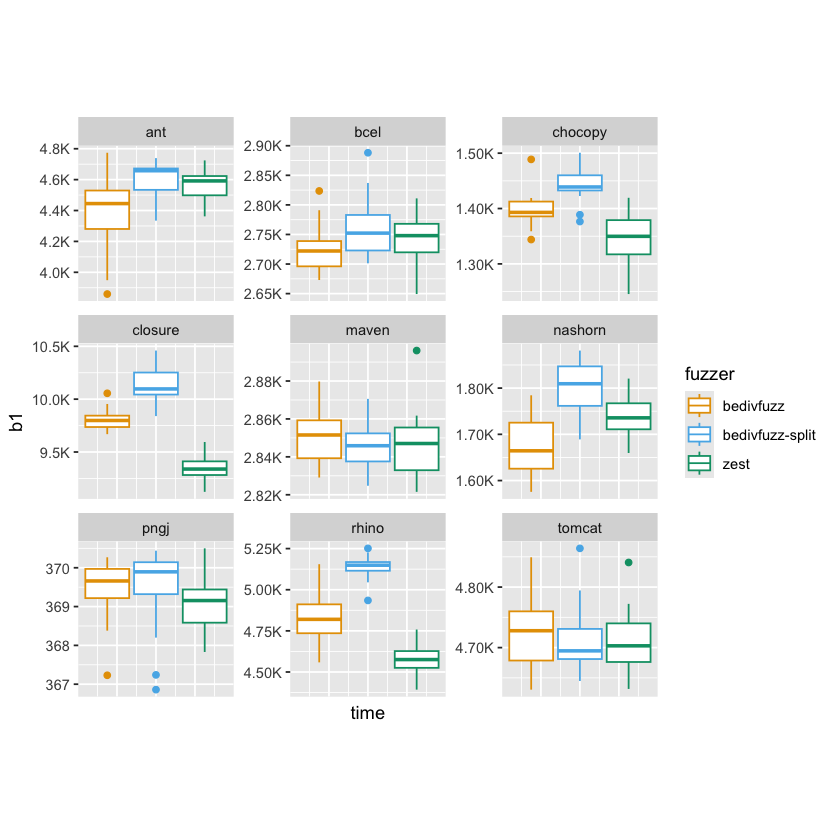

In [36]:
plot_coverage_boxplots(coverage_metrics_default, "b1")

In [37]:
generate_coverage_plots <- function(experiment_name) {
  coverage_data <- read.csv(
    paste("results", experiment_name, "coverage-data.csv", sep = "/")
  )
  for (metric in c("unique_paths", "unique_valid_paths", "b0", "b1", "b2")) {
    if (exists(metric, where = coverage_data)) {
      plot_mean_coverage_scores(
        coverage_data, metric, experiment_name, save_file = TRUE
      )
      plot_coverage_boxplots(
        coverage_data, metric, experiment_name, save_file = TRUE
      )
    }
  }
}

In [39]:
generate_coverage_plots("eval-bedivfuzz-metrics-semantic")

`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
v Created directory: plots/generated/eval-bedivfuzz-metrics-semantic/coverage.

Saving 7 x 7 in image
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
Saving 7 x 7 in image
`summarise()` has grouped output by 'fuzzer', 'subject'. You can override using
the `.groups` argument.
Saving 7 x 7 in image
Saving 7 x 7 in image


In [40]:
crashes_default <- read.csv(
  "results/eval-bedivfuzz-split-thesis-default/crash-data.csv"
)

In [41]:
head(crashes_default)

,fuzzer,subject,trial,tte,exception_class,crash_id,stack_trace
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>
1,zest,bcel,1,164233,java.lang.OutOfMemoryError,0,org.apache.bcel.generic.TABLESWITCH.initFromFile(TABLESWITCH.java:97)-org.apache.bcel.generic.Instruction.readInstruction(Instruction.java:393)-org.apache.bcel.generic.InstructionList.<init>(InstructionList.java:125)-org.apache.bcel.verifier.statics.Pass3aVerifier.do_verify(Pass3aVerifier.java:1088)-org.apache.bcel.verifier.PassVerifier.verify(PassVerifier.java:98)
2,zest,bcel,1,179361,java.lang.OutOfMemoryError,1,
3,zest,bcel,1,959299,org.apache.bcel.verifier.exc.AssertionViolatedException,2,org.apache.bcel.verifier.structurals.ControlFlowGraph$InstructionContextImpl.getOutFrame(ControlFlowGraph.java:285)-org.apache.bcel.verifier.structurals.Pass3bVerifier.circulationPump(Pass3bVerifier.java:275)-org.apache.bcel.verifier.structurals.Pass3bVerifier.do_verify(Pass3bVerifier.java:386)-org.apache.bcel.verifier.PassVerifier.verify(PassVerifier.java:98)-org.apache.bcel.verifier.Verifier.doPass3b(Verifier.java:166)
4,zest,bcel,1,4362516,org.apache.bcel.verifier.exc.AssertionViolatedException,3,java.base/jdk.internal.util.Preconditions.outOfBounds(Preconditions.java:64)-java.base/jdk.internal.util.Preconditions.outOfBoundsCheckIndex(Preconditions.java:70)-java.base/jdk.internal.util.Preconditions.checkIndex(Preconditions.java:248)-java.base/java.util.Objects.checkIndex(Objects.java:372)-java.base/java.util.ArrayList.get(ArrayList.java:459)
5,zest,bcel,1,8133614,org.apache.bcel.verifier.exc.AssertionViolatedException,3,java.base/jdk.internal.util.Preconditions.outOfBounds(Preconditions.java:64)-java.base/jdk.internal.util.Preconditions.outOfBoundsCheckIndex(Preconditions.java:70)-java.base/jdk.internal.util.Preconditions.checkIndex(Preconditions.java:248)-java.base/java.util.Objects.checkIndex(Objects.java:372)-java.base/java.util.ArrayList.get(ArrayList.java:459)
6,zest,bcel,2,168950,java.lang.OutOfMemoryError,4,org.apache.bcel.generic.TABLESWITCH.initFromFile(TABLESWITCH.java:98)-org.apache.bcel.generic.Instruction.readInstruction(Instruction.java:393)-org.apache.bcel.generic.InstructionList.<init>(InstructionList.java:125)-org.apache.bcel.verifier.statics.Pass3aVerifier.do_verify(Pass3aVerifier.java:1088)-org.apache.bcel.verifier.PassVerifier.verify(PassVerifier.java:98)


---
## Exploratory analysis: Fuzzer performance over time
- Proxy measure and bug performance over time
- Performance relative to best median score (FuzzBench performance metric)
- Ranking over time

In [6]:
coverage_trial_scores <- read.csv("csv/generated/coverage_trial_scores.csv") |>
  subset(scoring_function %in% c("bb_coverage", "hill_number_1", "hill_number_2")) |>
  mutate(time = time / 4.0)
bug_trial_scores <- read.csv("csv/generated/bug_trial_scores.csv") |>
  mutate(time = time / 4.0)

In [7]:
# Aggregate trial scores using median
median_coverage_scores <- coverage_trial_scores |>
  group_by(scoring_function, subject, fuzzer, seed_id, time) |>
  summarize(
    coverage_score = median(coverage_score),
    .groups = "keep"
  )

median_bug_scores <- bug_trial_scores |>
  group_by(scoring_function, subject, fuzzer, seed_id, time) |>
  summarize(
    bug_score = median(bug_score, na.rm = TRUE)
  )

`summarise()` has grouped output by 'scoring_function', 'subject', 'fuzzer',
'seed_id'. You can override using the `.groups` argument.


In [8]:
# Compute performance relative to best median fuzzer performance
# This metric is reported in FuzzBench reports as well

max_coverage_scores <- median_coverage_scores |>
  group_by(scoring_function, subject, seed_id, time) |>
  summarize(
    max_coverage_score = max(coverage_score, na.rm = TRUE)
  )

median_coverage_performances <- left_join(
  median_coverage_scores, max_coverage_scores,
  by = c("scoring_function", "subject", "seed_id", "time")
) |> mutate(
  relative_coverage_performance = coverage_score / max_coverage_score
)

max_bug_scores <- median_bug_scores |>
  group_by(scoring_function, subject, seed_id, time) |>
  summarize(
    max_bug_score = if (all(is.na(bug_score))) {
      NA_real_  # Return NA_real_ if all values in the group are NA
    } else {
      if (all(scoring_function == "tte")) {
        min(bug_score, na.rm = TRUE)
      } else {
        max(bug_score, na.rm = TRUE)
      }
    }
  )

median_bug_performances <- left_join(
  median_bug_scores, max_bug_scores,
  by = c("scoring_function", "subject", "seed_id", "time")
) |> mutate(
  relative_bug_performance = if_else(
    scoring_function == "tte",
    if_else(bug_score == 0, 0, max_bug_score / bug_score),
    if_else(max_bug_score == 0, 0, bug_score / max_bug_score)
  )
)

`summarise()` has grouped output by 'scoring_function', 'subject', 'seed_id'.
You can override using the `.groups` argument.
`summarise()` has grouped output by 'scoring_function', 'subject', 'seed_id'.
You can override using the `.groups` argument.


In [9]:
plot_coverage_scores <- function(proxy_metric, seed, measure, save_file = FALSE) {
  proxy_scores <- subset(
    median_coverage_performances,
    scoring_function == proxy_metric & seed_id == seed
  )

  plt <- ggplot(proxy_scores, aes(time, !!sym(measure))) +
    geom_line(aes(color = fuzzer)) +
    scale_x_continuous(breaks = c(0, 6, 12, 18, 24)) +
    xlab("Time") +
    ylab(
      ifelse(
        measure == "coverage_score",
        "Median proxy score",
        "Median proxy performance"
      )
    ) +
    scale_color_okabe_ito() +
    facet_wrap(~subject, scale = "free", ncol = ifelse(seed == 1, 3, 4)) +
    theme(aspect.ratio = 1)

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/coverage/%s/%s/%s.pdf",
      measure, ifelse(seed == 1, "empty_seed", "non_empty_seed"), proxy_metric
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [10]:
# Executing this cell will generate proxy score and performance over time plots for all proxy metrics
# Output: plots/generated/coverage/<coverage_[score|performance]>/<seed_id>/<proxy_metric>.pdf
for (proxy_metric in c("bb_coverage", "hill_number_1", "hill_number_2")) {
  for (seed in c(1, 2)) {
    plot_coverage_scores(proxy_metric, seed, "coverage_score", save_file = TRUE)
    plot_coverage_scores(proxy_metric, seed, "relative_coverage_performance", save_file = TRUE)
  }
}

Saving 7 x 7 in image
v Created directory: plots/generated/coverage/relative_coverage_performance/empty_seed.

Saving 7 x 7 in image
Saving 7 x 7 in image
v Created directory: plots/generated/coverage/relative_coverage_performance/non_empty_seed.

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


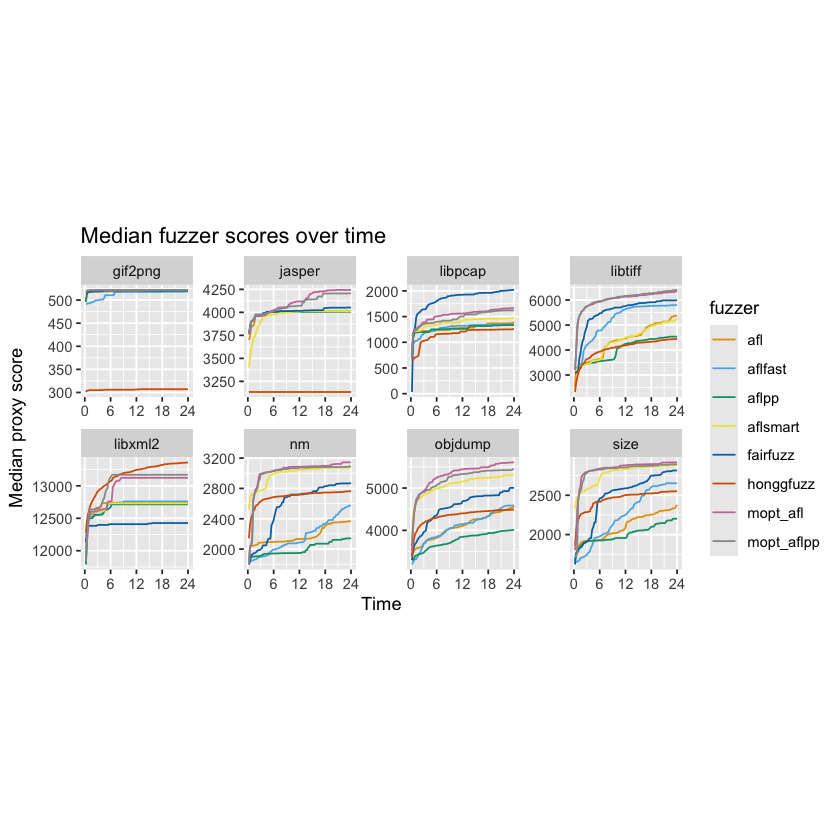

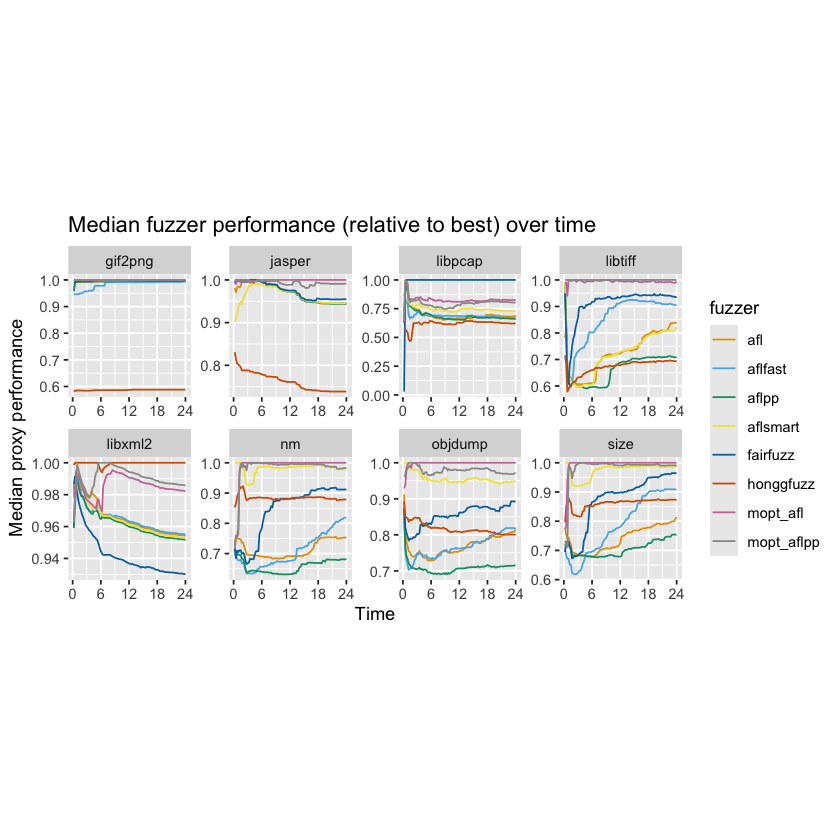

In [11]:
plot_coverage_scores("bb_coverage", 2, "coverage_score") +
  ggtitle("Median fuzzer scores over time")

plot_coverage_scores("bb_coverage", 2, "relative_coverage_performance") +
  ggtitle("Median fuzzer performance (relative to best) over time")

In [12]:
plot_bug_scores <- function(bug_metric, seed, measure, save_file = FALSE) {
  bug_scores <- subset(
    median_bug_performances,
    scoring_function == bug_metric & seed_id == seed
  ) |>
  drop_na()

  plt <- ggplot(bug_scores, aes(time, !!sym(measure))) +
    geom_line(aes(color = fuzzer)) +
    scale_x_continuous(breaks = c(0, 6, 12, 18, 24)) +
    xlab("Time") +
    ylab(
      ifelse(
        measure == "bug_score",
        "Median bug score",
        "Median bug performance"
      )
    ) +
    scale_color_okabe_ito() +
    facet_wrap(~subject, scale = "free", ncol = ifelse(seed == 1, 3, 4)) +
    theme(aspect.ratio = 1)

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/bugs/%s/%s/%s.pdf",
      measure, ifelse(seed == 1, "empty_seed", "non_empty_seed"), bug_metric
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [13]:
# Executing this cell will generate bug score and performance over time plots for all bug-based metrics
# Output: plots/generated/bugs/<bug_[score|performance]>/<seed_id>/<bug_metric>.pdf
for (bug_metric in c("bug_coverage_3", "tte", "bb_score", "bug_quality")) {
  for (seed in c(1, 2)) {
    plot_bug_scores(bug_metric, seed, "bug_score", save_file = TRUE)
    plot_bug_scores(bug_metric, seed, "relative_bug_performance", save_file = TRUE)
  }
}

Saving 7 x 7 in image
v Created directory: plots/generated/bugs/relative_bug_performance/empty_seed.

Saving 7 x 7 in image
Saving 7 x 7 in image
v Created directory: plots/generated/bugs/relative_bug_performance/non_empty_seed.

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


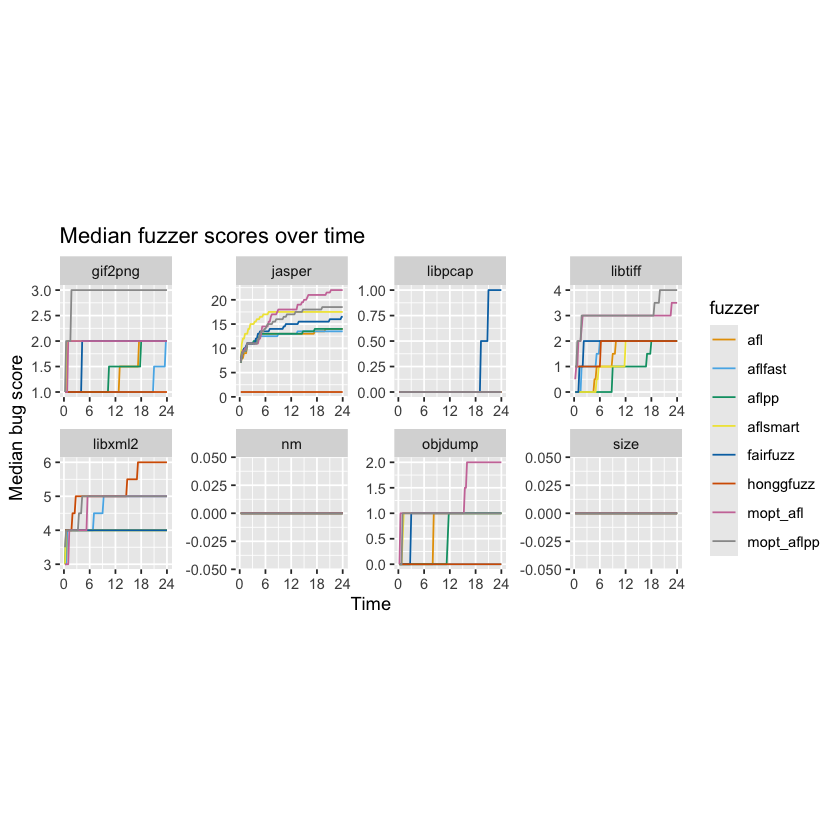

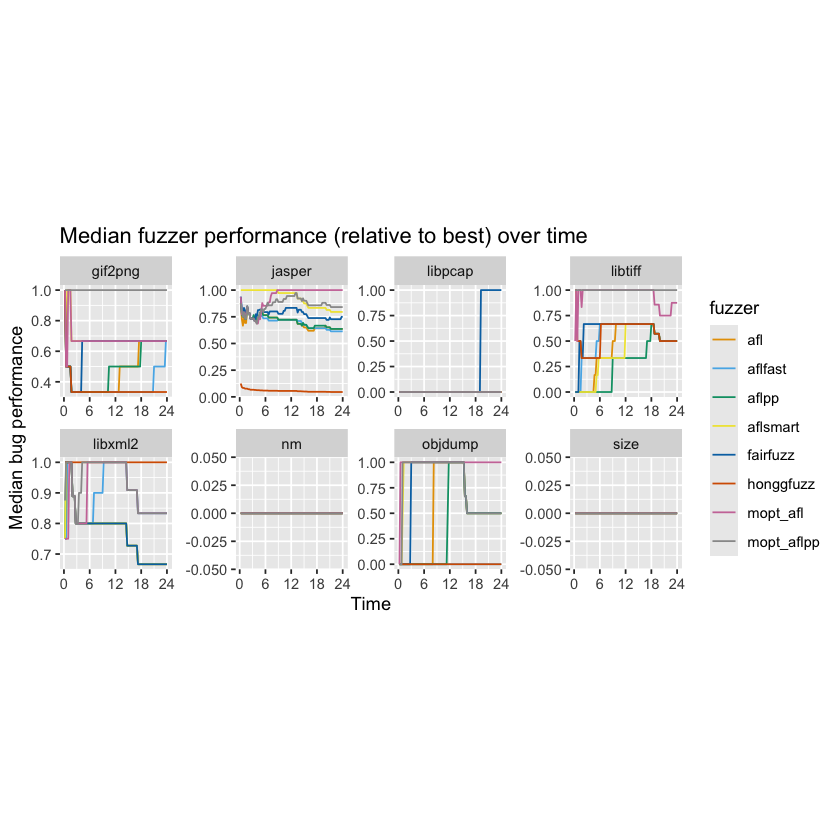

In [14]:
plot_bug_scores("bug_coverage_3", 2, "bug_score") +
  ggtitle("Median fuzzer scores over time")

plot_bug_scores("bug_coverage_3", 2, "relative_bug_performance") +
  ggtitle("Median fuzzer performance (relative to best) over time")

Warning message:
"Removed 497 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Saving 7 x 7 in image
Warning message:
"Removed 497 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


[1] "plots/generated/bugs/tte/tte-boxplot.pdf"

Saving 7 x 7 in image


[1] "plots/generated/bugs/tte/tte-median_fuzzer_normalized.pdf"

`summarise()` has grouped output by 'subject'. You can override using the
`.groups` argument.


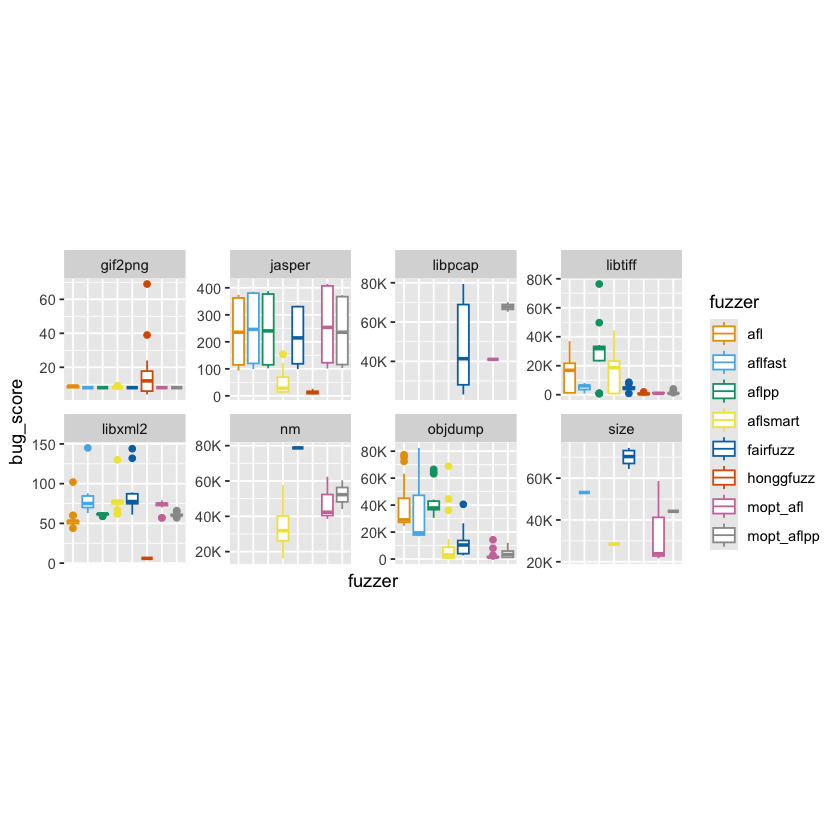

Saving 7 x 7 in image


[1] "plots/generated/bugs/tte/tte-min_median_fuzzer_normalized.pdf"

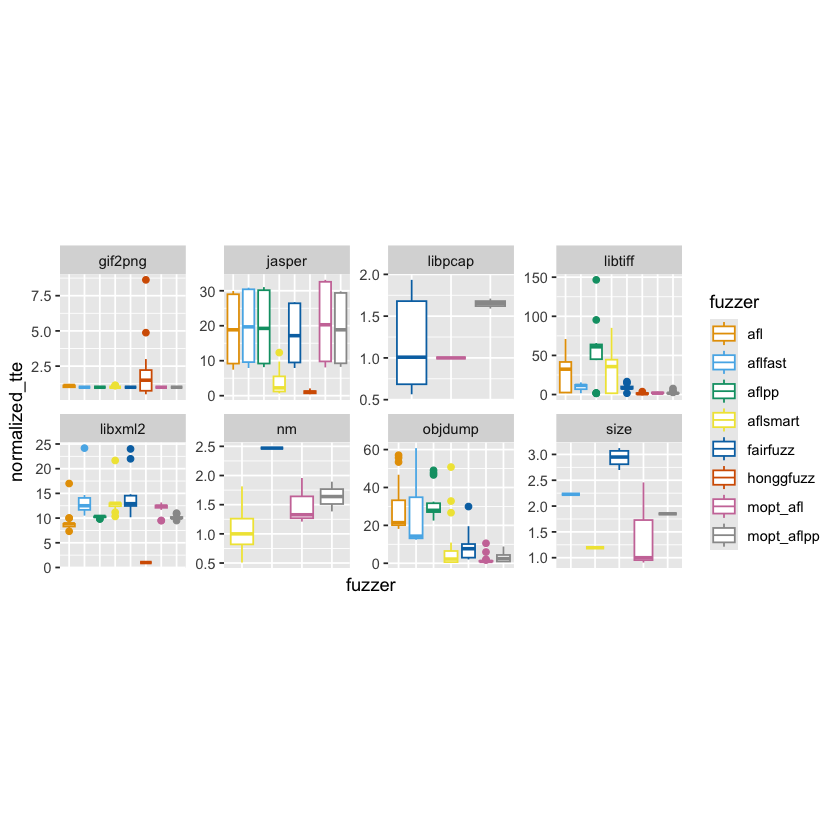

In [15]:
# For TTE, we additionally generate a boxplot, since performance over time
# remains constant once a fuzzer finds the first bug
tte <- subset(bug_trial_scores, scoring_function == "tte") |>
       subset(time == 24 & seed_id == 2)

ggplot(tte, aes(fuzzer, bug_score)) +
  geom_boxplot(aes(color = fuzzer)) +
  scale_y_continuous(label = label_number(scale_cut = cut_short_scale())) +
  scale_color_okabe_ito() +
  facet_wrap(~subject, ncol = 4, scales = "free") +
  theme(
    aspect.ratio = 1,
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
)

file_name <- "plots/generated/bugs/tte/tte-boxplot.pdf"
ggsave(file_name, create.dir = TRUE)
knitr::plot_crop(file_name)

median_tte_per_subject <- tte |>
  group_by(subject) |>
  summarize(
    median_tte = median(bug_score, na.rm = TRUE)
  )

tte_normalized <- left_join(tte, median_tte_per_subject, by = "subject") |>
  group_by(subject) |>
  mutate(
    normalized_tte = bug_score / median_tte
  ) |>
  drop_na()

#ggplot(tte, aes(fuzzer, bug_score)) +
plt <- ggplot(tte_normalized, aes(fuzzer, normalized_tte)) +
  geom_boxplot(aes(color = fuzzer)) +
  scale_y_continuous() +
  scale_color_okabe_ito() +
  facet_wrap(~subject, ncol = 4, scales = "free") +
  theme(
    aspect.ratio = 1,
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
)

file_name <- "plots/generated/bugs/tte/tte-median_fuzzer_normalized.pdf"
ggsave(file_name, create.dir = TRUE)
knitr::plot_crop(file_name)

min_median_tte_per_subject <- tte |>
  group_by(subject, fuzzer) |>
  summarize(
    median_tte = median(bug_score, na.rm = TRUE)
  ) |>
  group_by(subject) |>
  summarize(
    median_tte = min(median_tte, na.rm = TRUE)
  )

tte_min_normalized <- left_join(tte, min_median_tte_per_subject, by = "subject") |>
  group_by(subject) |>
  mutate(
    normalized_tte = bug_score / median_tte
  ) |>
  drop_na()

ggplot(tte_min_normalized, aes(fuzzer, normalized_tte)) +
  geom_boxplot(aes(color = fuzzer)) +
  scale_y_continuous() +
  scale_color_okabe_ito() +
  facet_wrap(~subject, ncol = 4, scales = "free") +
  theme(
    aspect.ratio = 1,
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
)

file_name <- "plots/generated/bugs/tte/tte-min_median_fuzzer_normalized.pdf"
ggsave(file_name)
knitr::plot_crop(file_name)

## Exploratory analysis: Fuzzer rankings over time
- Rather than comparing relative differences, we inspect the stability of the rankings over time
- We break ties using the mean TTE, the impact of this decision is evaluated later

In [16]:
coverage_ranks <- median_coverage_scores |>
  group_by(scoring_function, subject, seed_id, time) |>
  mutate(
    coverage_rank = rank(desc(coverage_score)),
  )

In [17]:
# Ties in bug ranking are broken by mean-TTE
mean_tte <- bug_trial_scores |>
  subset(scoring_function == "tte") |>
  group_by(subject, fuzzer, seed_id, time) |>
  summarize(
    mean_tte = mean(bug_score, na.rm = TRUE)
  )

bug_ranks <- left_join(median_bug_scores, mean_tte, by = c("subject", "fuzzer", "seed_id", "time")) |>
  group_by(scoring_function, subject, seed_id, time) |>
  mutate(
    bug_rank = if_else(
      scoring_function == "tte", # TTE is scored from low to high
      order(order(bug_score, mean_tte)),
      order(order(desc(bug_score), mean_tte))
    )
  ) |>
  group_by(scoring_function, subject, seed_id, time, bug_score, mean_tte) |>
  mutate( # Assign average rank for any remaining ties
    bug_rank = mean(bug_rank),
  )

bug_ranks_no_tiebreak <- median_bug_scores |>
  group_by(scoring_function, subject, seed_id, time) |>
    mutate(
      bug_rank = if_else(
        scoring_function == "tte", # TTE is scored from low to high
        rank(bug_score),
        rank(desc(bug_score))
      ),
    ) |>
    group_by(scoring_function, subject, seed_id, time, bug_score) |>
    mutate( # Assign average rank for any remaining ties
      bug_rank = mean(bug_rank)
    )

`summarise()` has grouped output by 'subject', 'fuzzer', 'seed_id'. You can
override using the `.groups` argument.


In [18]:
plot_coverage_rankings <- function(proxy_metric, seed, save_file = FALSE) {
  plt <- ggplot(subset(coverage_ranks, scoring_function == proxy_metric & seed_id == seed), aes(time, coverage_rank)) +
    geom_line(aes(color = fuzzer)) +
    scale_x_continuous(breaks = c(0, 6, 12, 18, 24)) +
    scale_y_continuous(breaks = seq(0, 8)) +
    xlab("Time") +
    ylab("Fuzzer Rank") +
    scale_color_okabe_ito() +
    facet_wrap(~subject, ncol = ifelse(seed == 1, 3, 4)) +
    theme(aspect.ratio = 1)

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/coverage/ranking/%s/%s.pdf",
      ifelse(seed == 1, "empty_seed", "non_empty_seed"), proxy_metric
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [19]:
# Generate ranking-over-time plots for each proxy metric
# Output: plots/generated/coverage/ranking/<seed_id>/<proxy_metric>.pdf
for (proxy_metric in c("bb_coverage", "hill_number_1", "hill_number_2")) {
  for (seed in c(1, 2)) {
    plot_coverage_rankings(proxy_metric, seed, save_file = TRUE)
  }
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


In [20]:
plot_bug_rankings <- function(bug_metric, seed, save_file = FALSE) {
  plt <- ggplot(subset(bug_ranks, scoring_function == bug_metric & seed_id == seed), aes(time, bug_rank)) +
      geom_line(aes(color = fuzzer)) +
      scale_x_continuous(breaks = c(0, 6, 12, 18, 24)) +
      scale_y_continuous(breaks = seq(0, 8)) +
      xlab("Time") +
      ylab("Fuzzer Rank") +
      scale_color_okabe_ito() +
      facet_wrap(~subject, ncol = ifelse(seed == 1, 3, 4)) +
      theme(aspect.ratio = 1)

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/bugs/ranking/%s/%s.pdf",
      ifelse(seed == 1, "empty_seed", "non_empty_seed"), bug_metric
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}


In [21]:
# Generate ranking-over-time plots for each bug-based metric
# Output: plots/generated/bugs/ranking/<seed_id>/<bug_metric>.pdf
for (bug_metric in c("bug_coverage_3", "tte", "bb_score", "bug_quality")) {
  for (seed in c(1, 2)) {
    plot_bug_rankings(bug_metric, seed, save_file = TRUE)
  }
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


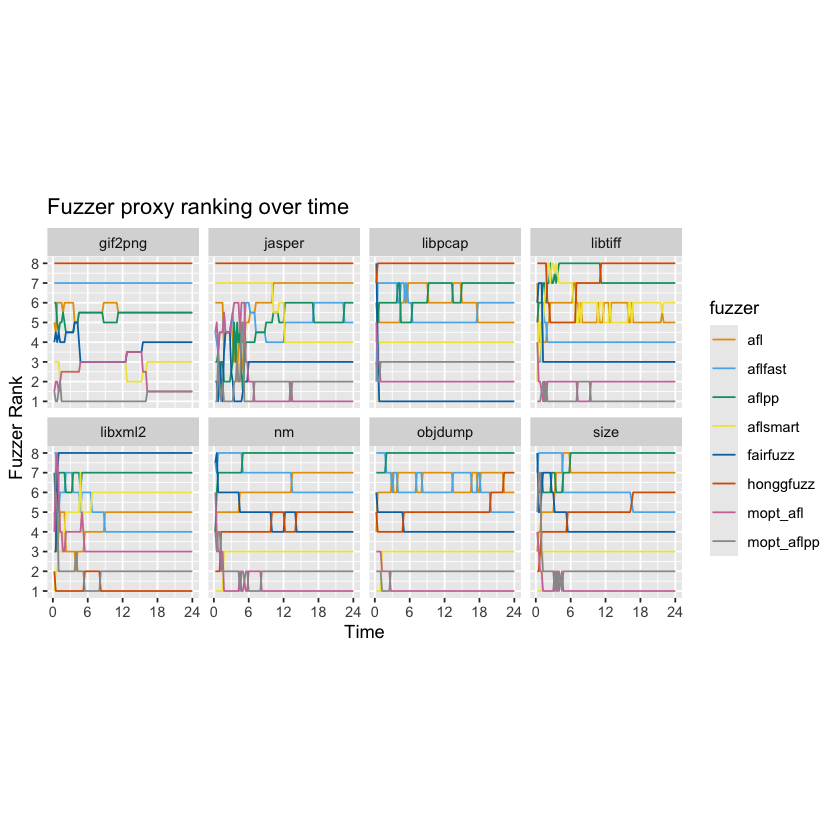

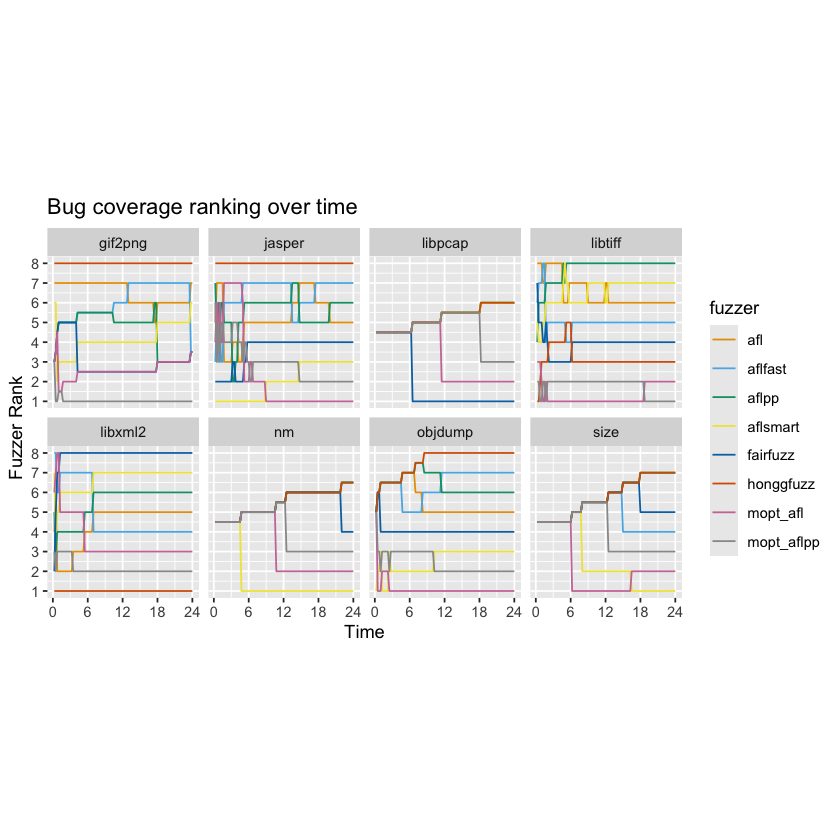

In [22]:
plot_coverage_rankings("bb_coverage", 2) +
  ggtitle("Fuzzer proxy ranking over time")

plot_bug_rankings("bug_coverage_3", 2) +
  ggtitle("Bug coverage ranking over time")

---
## RQ.1 Correlation between proxy-based metrics and bug coverage
- Analogous to Böhme et al., we determine correlation between proxy metric and bug coverage for the mean fuzzer performance

In [23]:
coverage_scores <- read.csv("csv/generated/coverage_trial_scores.csv") |>
  subset(scoring_function %in% c("bb_coverage", "hill_number_1", "hill_number_2")) |>
  rename(coverage_metric = scoring_function)

bug_scores <- read.csv("csv/generated/bug_trial_scores.csv") |>
  rename(bug_metric = scoring_function)

In [24]:
fuzzer_scores <- merge(
  coverage_scores, subset(bug_scores, bug_metric == "bug_coverage_3"),
  by = c("subject", "fuzzer", "seed_id", "time", "trial")
)

# Performance of the "mean" fuzzer across all fuzzer trials
mean_fuzzer_scores <- fuzzer_scores |>
  group_by(coverage_metric, subject, seed_id, time) |>
  summarize(
    coverage = mean(coverage_score),
    bugs = mean(bug_score)
  )

correlation <- mean_fuzzer_scores |>
  group_by(coverage_metric, subject, seed_id) |>
  summarize(
    correlation = round(cor(coverage, bugs, method = "spearman", use = "pairwise"), 3)
  )

`summarise()` has grouped output by 'coverage_metric', 'subject', 'seed_id'.
You can override using the `.groups` argument.
`summarise()` has grouped output by 'coverage_metric', 'subject'. You can
override using the `.groups` argument.


Saving 7 x 7 in image


[1] "plots/generated/correlation/mean_fuzzer_performance.pdf"

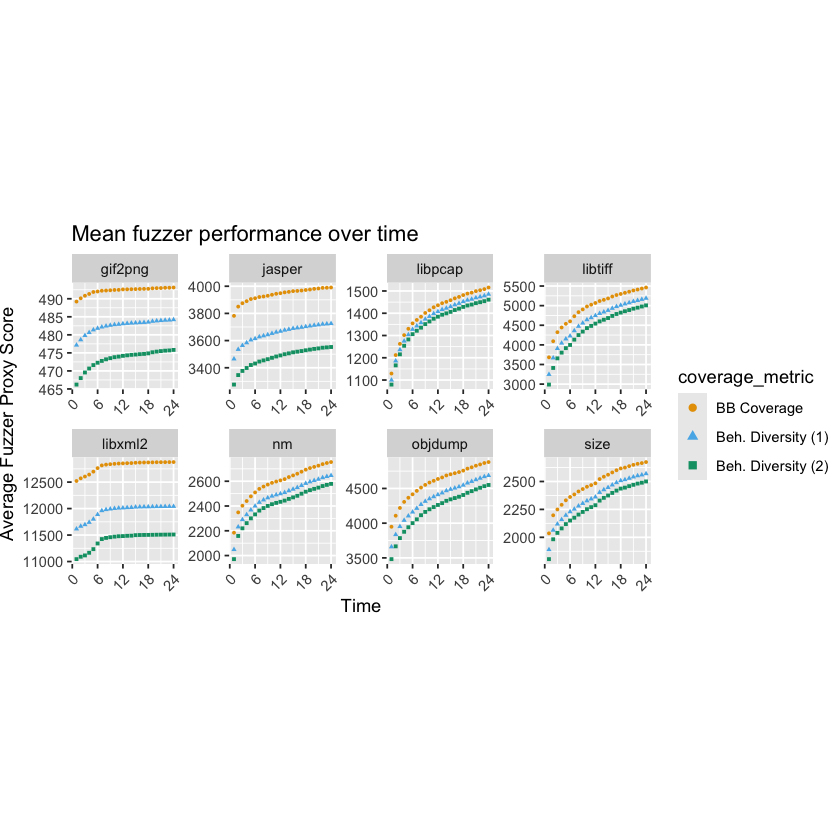

In [25]:
# Mean fuzzer performance
mean_fuzzer <- mean_fuzzer_scores |>
  mutate(
    time = time / 4.0,
    coverage_metric = recode(coverage_metric,
          "bb_coverage" = "BB Coverage",
          "hill_number_1" = "Beh. Diversity (1)",
          "hill_number_2" = "Beh. Diversity (2)"),
  ) |>
  subset(seed_id == 2 & time %% 1 == 0)

plt <- ggplot(mean_fuzzer, aes(time, coverage)) +
  geom_point(aes(shape = coverage_metric, color = coverage_metric), size = 0.75) +
  #scale_y_log10() +
  scale_x_continuous(breaks = c(0, 6, 12, 18, 24)) +
  xlab("Time") +
  ylab("Average Fuzzer Proxy Score") +
  facet_wrap(~subject, scale = "free", ncol = 4) +
  scale_color_okabe_ito() +
  theme(
    aspect.ratio = 1,
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.margin = grid::unit(c(0, 0, 0, 0), "mm"),
  ) +
  guides(color = guide_legend(override.aes = list(size = 2)))

plot_name <- sprintf("plots/generated/correlation/mean_fuzzer_performance.pdf")
ggsave(plot_name, create.dir = TRUE)
knitr::plot_crop(plot_name)

plt + ggtitle("Mean fuzzer performance over time")

In [26]:
subset(correlation, coverage_metric == "bb_coverage" & seed_id == 2)

coverage_metric,subject,seed_id,correlation
<chr>,<chr>,<int>,<dbl>
bb_coverage,gif2png,2,0.997
bb_coverage,jasper,2,1.000
bb_coverage,libpcap,2,0.988
bb_coverage,libtiff,2,1.000
bb_coverage,libxml2,2,0.996
bb_coverage,nm,2,0.989
bb_coverage,objdump,2,0.999
bb_coverage,size,2,0.986


In [27]:
subset(correlation, coverage_metric == "hill_number_2" & seed_id == 2)

coverage_metric,subject,seed_id,correlation
<chr>,<chr>,<int>,<dbl>
hill_number_2,gif2png,2,0.997
hill_number_2,jasper,2,1.000
hill_number_2,libpcap,2,0.988
hill_number_2,libtiff,2,1.000
hill_number_2,libxml2,2,0.996
hill_number_2,nm,2,0.989
hill_number_2,objdump,2,0.999
hill_number_2,size,2,0.986


In [28]:
correlation |>
  group_by(coverage_metric, seed_id) |>
  summarize(
    mean_correlation = round(mean(correlation), 3),
    median_correlation = round(median(correlation), 3)
  ) |>
  filter(seed_id == 2)

`summarise()` has grouped output by 'coverage_metric'. You can override using
the `.groups` argument.


coverage_metric,seed_id,mean_correlation,median_correlation
<chr>,<int>,<dbl>,<dbl>
bb_coverage,2,0.994,0.996
hill_number_1,2,0.994,0.996
hill_number_2,2,0.994,0.996


In [29]:
plot_correlation <- function(seed, save_file = FALSE) {
  corr_df <- mean_fuzzer_scores |>
    subset(seed_id == seed & bugs > 0) |>
    mutate(
        coverage_metric = recode(coverage_metric,
          "bb_coverage" = "BB Coverage",
          "hill_number_1" = "Beh. Diversity (1)",
          "hill_number_2" = "Beh. Diversity (2)"),
      )

  plt <- ggplot(corr_df, aes(coverage, bugs)) +
    geom_point(aes(shape = coverage_metric, color = coverage_metric), size = 0.75) +
    scale_y_log10() +
    scale_x_continuous(
      breaks = breaks_extended(n = 4),
      labels = label_number(suffix = "k", accuracy = 0.1, scale = 1e-3)
    ) +
    xlab("Average Proxy Score") +
    ylab("Average #Bugs Discovered") +
    scale_color_manual(
      values = c(
          "BB Coverage" = "#E69F00",
          "Beh. Diversity (1)" = "#56B4E9",
          "Beh. Diversity (2)" = "#009E73"
      )
  ) +
    facet_wrap(~subject, scale = "free", ncol = ifelse(seed == 1, 3, 4)) +
    theme(
      aspect.ratio = 1,
      axis.text.x = element_text(angle = 45, hjust = 1),
      plot.margin = grid::unit(c(0, 0, 0, 0), "mm"),
    ) +
    guides(
      fill = guide_legend(title = "Proxy Metric"),
      color = guide_legend(override.aes = list(size = 2))
    )

  if (save_file) {
    plot_name <- sprintf("plots/generated/correlation/%s.pdf", ifelse(seed == 1, "empty_seed", "non_empty_seed"))
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [30]:
# Generate proxy-score vs. bug_coverage plots for both seed configs
# Output: plots/generated/correlation/<seed_id>.pdf
plt <- plot_correlation(seed = 1, save_file = TRUE)
plt <- plot_correlation(seed = 2, save_file = TRUE)

Saving 7 x 7 in image
Saving 7 x 7 in image


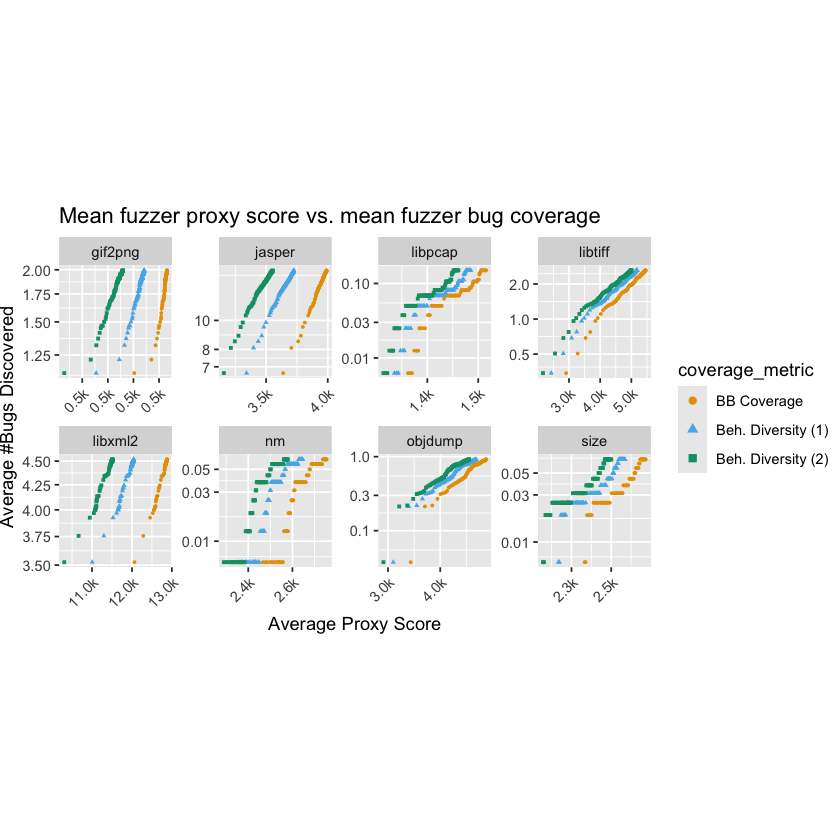

In [31]:
plot_correlation(seed = 2) +
  ggtitle("Mean fuzzer proxy score vs. mean fuzzer bug coverage")

---
## RQ.2 Agreement on ranking
- Ranking scatter plots 
- Comparison of mean/median rank across all subjects
- Agreement in terms of spearman and kendall rank correlation over time

### RQ.2 Agreement on ranking: proxy vs. bug performance scatter plot

In [32]:
fuzzer_ranks <- merge(coverage_ranks, bug_ranks,
  by = c("subject", "fuzzer", "seed_id", "time")
) |>
  subset(seed_id == 1 & time == 24) |>
  subset(scoring_function.x == "bb_coverage" & scoring_function.y == "bug_coverage_3")

fuzzer_ranks_no_tiebreak <- merge(coverage_ranks, bug_ranks_no_tiebreak,
  by = c("subject", "fuzzer", "seed_id", "time")
) |>
  subset(seed_id == 1 & time == 24) |>
  subset(scoring_function.x == "bb_coverage" & scoring_function.y == "bug_coverage_3")

In [33]:
plot_rank_agreement_scatter <- function(coverage_metric, bug_metric, seed, tiebreak, save_file = FALSE) {
  bug_ranks_to_merge <- if (tiebreak) bug_ranks else bug_ranks_no_tiebreak
  rankings <- merge(coverage_ranks, bug_ranks_to_merge, by = c("subject", "fuzzer", "seed_id", "time")) |>
    subset(time == 24 & seed_id == seed) |>
    subset(scoring_function.x == coverage_metric & scoring_function.y == bug_metric)

  plt <- ggplot(rankings, aes(coverage_rank, bug_rank)) +
    geom_count(size = 5, aes(color = as.integer(after_stat(n)))) +
    scale_y_continuous(breaks = seq(1, 8)) +
    scale_x_continuous(breaks = seq(1, 8)) +
    scale_color_viridis_c(
      name = "#benchmarks", breaks = pretty_breaks(), limits = c(1, 5)
    ) +
    xlab(sprintf("Fuzzer ranks by median %s", coverage_metric)) +
    ylab(sprintf("Fuzzer ranks by median %s", bug_metric)) +
    theme(legend.direction = "horizontal", legend.position = "bottom")

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/rank_agreement/scatter_plot/%s%s%s-%s.pdf",
      ifelse(seed == 1, "empty_seed", "non_empty_seed"),
      ifelse(tiebreak, "/", "/no_tiebreak/"),
      coverage_metric, bug_metric
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [34]:
# Generate scatter plots comparing proxy vs. bug rankings for each measure combination
# Also produces plots where bug rankings are *not* broken using the tte tiebreaker
# Output: plots/generated/rank_agreement/scatter_plot/<seed_id>/<proxy_metric>-<bug_metric>.pdf
for (proxy_metric in c("bb_coverage", "hill_number_1", "hill_number_2")) {
  for (bug_metric in c("bug_coverage_3", "tte", "bb_score", "bug_quality")) {
    for (seed in c(1, 2)) {
      plot_rank_agreement_scatter(
        proxy_metric, bug_metric, seed, tiebreak = TRUE, save_file = TRUE
      )

      plot_rank_agreement_scatter(
        proxy_metric, bug_metric, seed, tiebreak = FALSE, save_file = TRUE
      )
    }
  }
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x

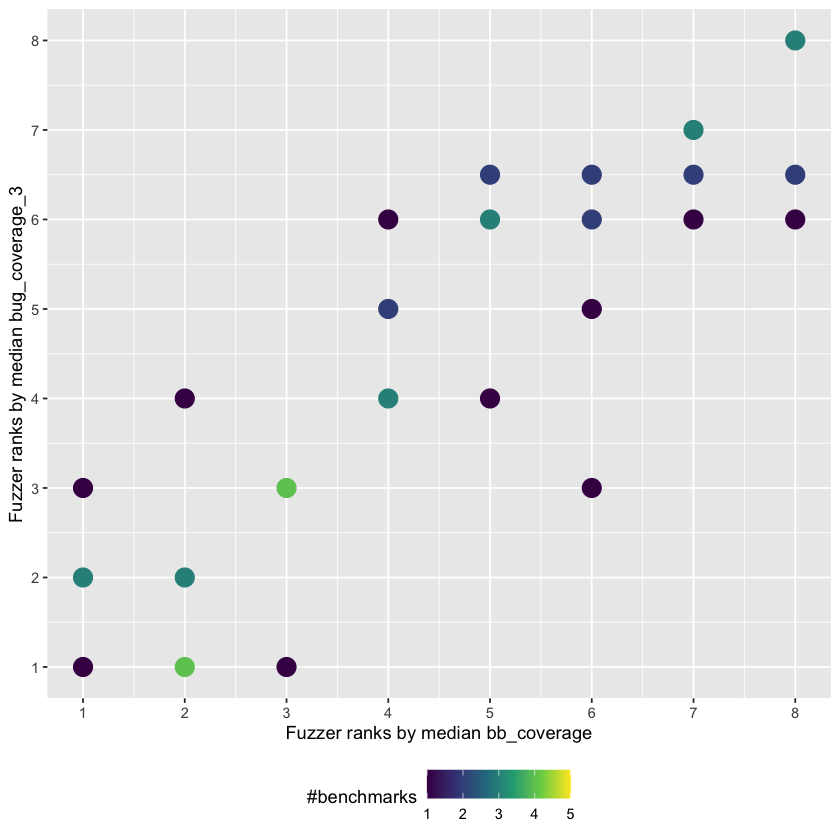

In [35]:
plot_rank_agreement_scatter("bb_coverage", "bug_coverage_3", seed = 1, tiebreak = TRUE)

Saving 7 x 7 in image


[1] "plots/generated/rank_agreement/scatter_plot/grid_empty_seed.pdf"

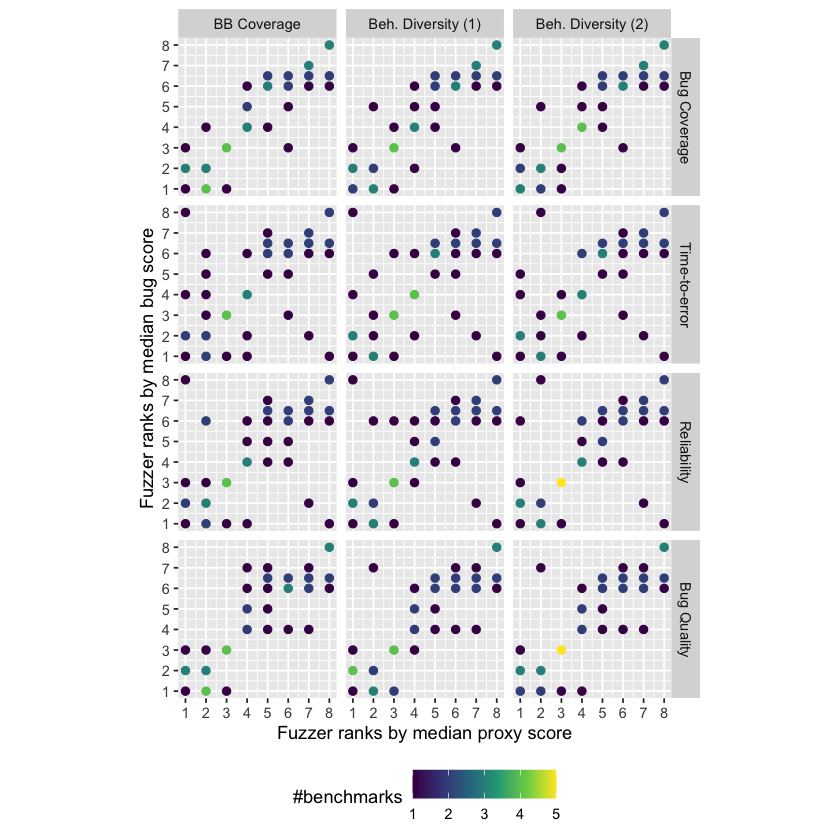

In [36]:
# This cell generates a facet plot showing scatter plot for all combinations of proxy vs. bug metric
seed <- 1

x <- ungroup(coverage_ranks) |>
  subset(seed_id == seed & time == 24) |>
  rename(proxy_metric = scoring_function) |>
  select(proxy_metric, subject, fuzzer, coverage_rank)

y <- ungroup(bug_ranks) |>
  subset(seed_id == seed & time == 24) |>
  rename(bug_metric = scoring_function) |>
  select(bug_metric, subject, fuzzer, bug_rank)

z <- full_join(x, y, by = c("subject", "fuzzer"), relationship = "many-to-many")
z$bug_metric <- factor(z$bug_metric, levels = c("bug_coverage_3", "tte", "bb_score", "bug_quality"))

ggplot(z, aes(coverage_rank, bug_rank)) +
    geom_count(size = 2, aes(color = as.integer(after_stat(n)))) +
    scale_y_continuous(breaks = seq(1, 8)) +
    scale_x_continuous(breaks = seq(1, 8)) +
    scale_color_viridis_c(
      name = "#benchmarks", breaks = pretty_breaks(), limits = c(1, 5)
    ) +
    xlab("Fuzzer ranks by median proxy score") +
    ylab("Fuzzer ranks by median bug score") +
    facet_grid(
      bug_metric ~ proxy_metric,
      labeller = as_labeller(c(
        "bb_coverage" = "BB Coverage",
        "hill_number_1" = "Beh. Diversity (1)",
        "hill_number_2" = "Beh. Diversity (2)",
        "bug_coverage_3" = "Bug Coverage",
        "tte" = "Time-to-error",
        "bb_score" = "Reliability",
        "bug_quality" = "Bug Quality"
      ))
    ) +
    theme(
      legend.direction = "horizontal",
      legend.position = "bottom",
      aspect.ratio = 1.0
    )

plot_name <- sprintf(
  "plots/generated/rank_agreement/scatter_plot/grid_%s.pdf",
  ifelse(seed == 1, "empty_seed", "non_empty_seed")
)
ggsave(plot_name, create.dir = TRUE)
knitr::plot_crop(plot_name)

### RQ.2 Agreement on ranking: scatter plot difference
- We compare the difference in counts for observed rank-pairs (proxy/bug rank)
- Differences indicate changes in the rankings
- The spread of the differences give insight on the impact on overall agreement (e.g., higher counts along the main diagonal are more desirable)

In [37]:
# Scatter plot difference
ranks_bb_coverage <- merge(coverage_ranks, bug_ranks,
  by = c("subject", "fuzzer", "seed_id", "time")
) |>
  subset(seed_id == 1 & time == 24) |>
  subset(scoring_function.x == "bb_coverage" & scoring_function.y == "tte")

ranks_hill_number <- merge(coverage_ranks, bug_ranks,
  by = c("subject", "fuzzer", "seed_id", "time")
) |>
  subset(seed_id == 1 & time == 24) |>
  subset(scoring_function.x == "hill_number_1" & scoring_function.y == "tte")

In [38]:
plot_rank_agreement_scatter_diff <- function(proxy_x, proxy_y, bug_metric, seed, save_file = FALSE) {
  ranks_bug_metric <- ungroup(bug_ranks) |>
    subset(seed_id == seed & time == 24 & scoring_function == bug_metric) |>
    select(subject, fuzzer, bug_rank)

  ranks_proxy_x <- ungroup(coverage_ranks) |>
    subset(seed_id == seed & time == 24 & scoring_function == proxy_x) |>
    select(subject, fuzzer, coverage_rank)

  ranks_proxy_y <- ungroup(coverage_ranks) |>
    subset(seed_id == seed & time == 24 & scoring_function == proxy_y) |>
    select(subject, fuzzer, coverage_rank)

  counts_x <- merge(ranks_proxy_x, ranks_bug_metric) |>
    count(coverage_rank, bug_rank, name = "counts_x")

  counts_y <- merge(ranks_proxy_y, ranks_bug_metric) |>
    count(coverage_rank, bug_rank, name = "counts_y")

  merged_counts <- full_join(counts_x, counts_y, by = c("coverage_rank", "bug_rank")) |>
    replace_na(list(counts_x = 0, counts_y = 0)) |>
    mutate(
      counts_diff = counts_x - counts_y
    )

  merged_counts$counts_diff <- factor(merged_counts$counts_diff)

  plt <- ggplot(merged_counts, aes(coverage_rank, bug_rank)) +
    geom_point(size = 5, aes(color = counts_diff)) +
    scale_y_continuous(breaks = seq(1, 8)) +
    scale_x_continuous(breaks = seq(1, 8)) +
    #scale_color_gradient2(low = "#56B4E9", mid = "white", high = "#E69F00", midpoint = 0, limits = c(-2, 2)) +
    scale_color_brewer(palette = "RdBu") +
    xlab("Fuzzer ranks by median proxy score") +
    ylab("Fuzzer ranks by median bug score") +
    labs(color = "Difference in #benchmarks") +
    theme(legend.direction = "horizontal", legend.position = "bottom")

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/rank_agreement/scatter_plot_diff/%s/%s-%s-%s.pdf",
      ifelse(seed == 1, "empty_seed", "non_empty_seed"), proxy_x, proxy_y, bug_metric
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [39]:
# Generate scatter plot difference for each proxy-proxy-bug combination
# Output: plots/generated/rank_agreement/scatter_plot_diff/<seed_id>/<proxy_metric_x>-<proxy_metric_y>-<bug_metric>.pdf
for (proxy_x in c("bb_coverage", "hill_number_1", "hill_number_2")) {
  for (proxy_y in c("bb_coverage", "hill_number_1", "hill_number_2")) {
    if (proxy_x == proxy_y) {
      next
    }
    for (bug_metric in c("bug_coverage_3", "tte", "bb_score", "bug_quality")) {
      for (seed in c(1, 2)) {
        plot_rank_agreement_scatter_diff(
          proxy_x, proxy_y, bug_metric, seed, save_file = TRUE
        )
      }
    }
  }
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x

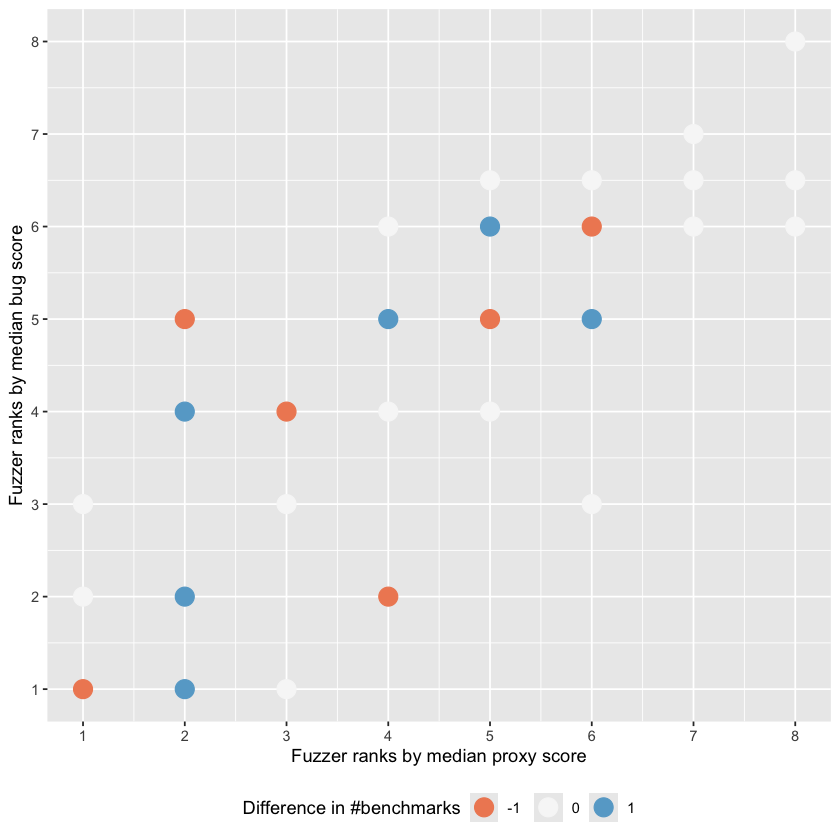

In [40]:
# Compute #benchmarks(bb_coverage) - #benchmarks(hill_number_1)
# The plot reveals higher counts for hill number along the diagonal, where both proxy and bug measure agree
plot_rank_agreement_scatter_diff(
  "bb_coverage", "hill_number_1", "bug_coverage_3", seed = 1
)

In [41]:
rank_difference <- function(proxy_x, proxy_y, bug_metric, seed, cmp_id) {
  ranks_bug_metric <- ungroup(bug_ranks) |>
    subset(seed_id == seed & time == 24 & scoring_function == bug_metric) |>
    select(subject, fuzzer, bug_rank)

  ranks_proxy_x <- ungroup(coverage_ranks) |>
    subset(seed_id == seed & time == 24 & scoring_function == proxy_x) |>
    select(subject, fuzzer, coverage_rank)

  ranks_proxy_y <- ungroup(coverage_ranks) |>
    subset(seed_id == seed & time == 24 & scoring_function == proxy_y) |>
    select(subject, fuzzer, coverage_rank)

  counts_x <- merge(ranks_proxy_x, ranks_bug_metric) |>
    count(coverage_rank, bug_rank, name = "counts_x")

  counts_y <- merge(ranks_proxy_y, ranks_bug_metric) |>
    count(coverage_rank, bug_rank, name = "counts_y")

  merged_counts <- full_join(counts_x, counts_y, by = c("coverage_rank", "bug_rank")) |>
    replace_na(list(counts_x = 0, counts_y = 0)) |>
    mutate(
      counts_diff = counts_x - counts_y
    )

  merged_counts$cmp_id <- cmp_id
  merged_counts$bug_metric <- recode(bug_metric,
    "bug_coverage_3" = "Bug Coverage",
    "tte" = "Time-to-error",
    "bb_score" = "Reliability",
    "bug_quality" = "Bug Quality"
  )

  return(merged_counts)
}

Saving 7 x 7 in image


[1] "plots/generated/rank_agreement/scatter_plot_diff/grid_empty_seed.pdf"

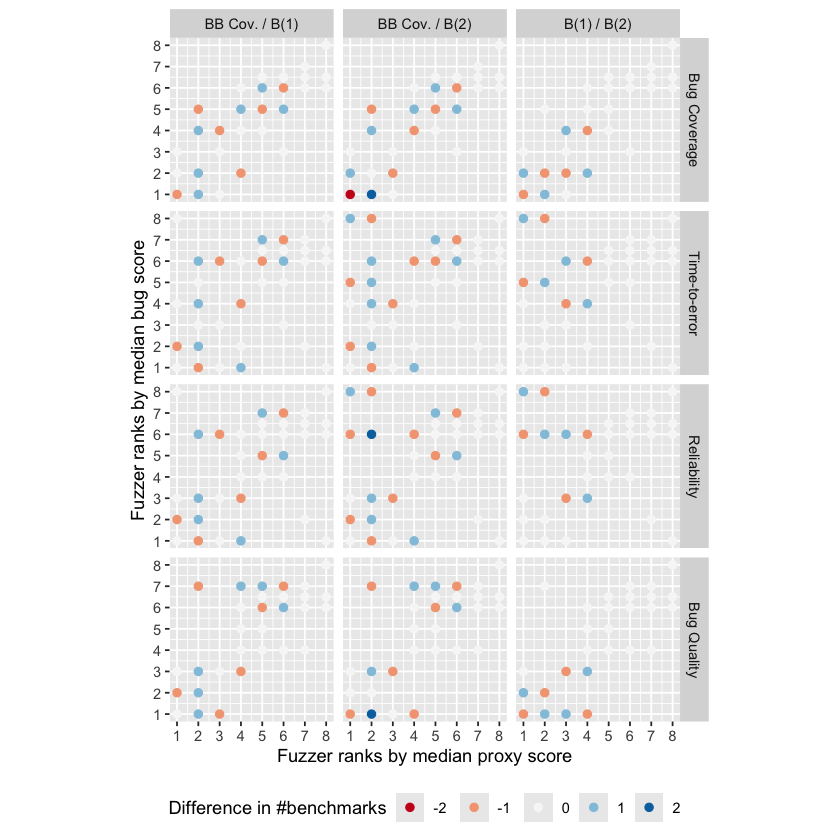

In [42]:
# Creates plot comparing all combinations of proxy metrics
seed <- 1
scatter_diff <- rbind(
  rank_difference("bb_coverage", "hill_number_1", "bug_coverage_3", seed, "BB Cov. / B(1)"),
  rank_difference("bb_coverage", "hill_number_1", "tte", seed, "BB Cov. / B(1)"),
  rank_difference("bb_coverage", "hill_number_1", "bb_score", seed, "BB Cov. / B(1)"),
  rank_difference("bb_coverage", "hill_number_1", "bug_quality", seed, "BB Cov. / B(1)"),
  rank_difference("bb_coverage", "hill_number_2", "bug_coverage_3", seed, "BB Cov. / B(2)"),
  rank_difference("bb_coverage", "hill_number_2", "tte", seed, "BB Cov. / B(2)"),
  rank_difference("bb_coverage", "hill_number_2", "bb_score", seed, "BB Cov. / B(2)"),
  rank_difference("bb_coverage", "hill_number_2", "bug_quality", seed, "BB Cov. / B(2)"),
  rank_difference("hill_number_1", "hill_number_2", "bug_coverage_3", seed, "B(1) / B(2)"),
  rank_difference("hill_number_1", "hill_number_2", "tte", seed, "B(1) / B(2)"),
  rank_difference("hill_number_1", "hill_number_2", "bb_score", seed, "B(1) / B(2)"),
  rank_difference("hill_number_1", "hill_number_2", "bug_quality", seed, "B(1) / B(2)")
)

scatter_diff$counts_diff <- factor(scatter_diff$counts_diff)
scatter_diff$bug_metric <- factor(
  scatter_diff$bug_metric,
  levels = c("Bug Coverage", "Time-to-error", "Reliability", "Bug Quality")
)
scatter_diff$cmp_id <- factor(
  scatter_diff$cmp_id,
  levels = c("BB Cov. / B(1)", "BB Cov. / B(2)", "B(1) / B(2)")
)

ggplot(scatter_diff, aes(coverage_rank, bug_rank)) +
  geom_point(size = 2, aes(color = counts_diff)) +
  scale_y_continuous(breaks = seq(1, 8)) +
  scale_x_continuous(breaks = seq(1, 8)) +
  #scale_color_gradient2(low = "#56B4E9", mid = "white", high = "#E69F00", midpoint = 0, limits = c(-2, 2)) +
  #scale_color_brewer(palette = "RdBu") +
  scale_color_manual(
    values = c(
        "-2" = "#CA0020",
        "-1" = "#F4A582",
        "0" = "#F7F7F7",
        "1" = "#92C5DE",
        "2" = "#0571B0"
    )
  ) +
  facet_grid(bug_metric ~ cmp_id) +
  theme(legend.direction = "horizontal", legend.position = "bottom", aspect.ratio = 1.0) +
  xlab("Fuzzer ranks by median proxy score") +
  ylab("Fuzzer ranks by median bug score") +
  labs(color = "Difference in #benchmarks")

plot_name <- sprintf(
  "plots/generated/rank_agreement/scatter_plot_diff/grid_%s.pdf",
  ifelse(seed == 1, "empty_seed", "non_empty_seed")
)
ggsave(plot_name, create.dir = TRUE)
knitr::plot_crop(plot_name)

### RQ.2 Agreement on ranking: median proxy/bug rank across all subjects

In [43]:
coverage_ranks |>
  subset(scoring_function == "bb_coverage") |>
  subset(seed_id == 2 & time == 24) |>
  group_by(fuzzer) |>
  summarize(
    median_rank = round(median(coverage_rank), 2),
    mean_rank = round(mean(coverage_rank), 2)
  )

fuzzer,median_rank,mean_rank
<chr>,<dbl>,<dbl>
afl,5.75,5.94
aflfast,5.00,5.25
aflpp,7.00,7.06
aflsmart,3.50,4.00
fairfuzz,4.00,3.88
honggfuzz,7.50,6.38
mopt_afl,1.25,1.56
mopt_aflpp,2.00,1.94


In [44]:
bug_ranks |>
subset(scoring_function == "bug_coverage_3") |>
  subset(seed_id == 2 & time == 24) |>
  group_by(fuzzer) |>
  summarize(
    median_rank = median(bug_rank),
    mean_rank = round(mean(bug_rank), 2)
  )

fuzzer,median_rank,mean_rank
<chr>,<dbl>,<dbl>
afl,6.00,5.94
aflfast,5.50,5.38
aflpp,6.00,6.12
aflsmart,4.50,4.25
fairfuzz,4.00,4.19
honggfuzz,6.75,5.94
mopt_afl,2.00,2.06
mopt_aflpp,2.00,2.12


### RQ2. Agreement on ranking: Mean/median performance across all subjects
- Fuzzer performance: score relative to best median fuzzer for a given subject

In [45]:
median_coverage_performances |>
  subset(scoring_function == "bb_coverage") |>
  subset(seed_id == 2 & time == 24) |>
  group_by(fuzzer) |>
  summarize(
    median_performance = round(median(relative_coverage_performance), 2),
    mean_performance = round(mean(relative_coverage_performance), 2)
  )

fuzzer,median_performance,mean_performance
<chr>,<dbl>,<dbl>
afl,0.83,0.85
aflfast,0.91,0.88
aflpp,0.73,0.80
aflsmart,0.95,0.92
fairfuzz,0.94,0.95
honggfuzz,0.77,0.77
mopt_afl,1.00,0.97
mopt_aflpp,0.99,0.97


In [46]:
median_bug_performances |>
  subset(scoring_function == "bug_coverage_3") |>
  subset(seed_id == 2 & time == 24) |>
  group_by(fuzzer) |>
  summarize(
    median_performance = round(median(relative_bug_performance), 2),
    mean_performance = round(mean(relative_bug_performance), 2)
  )

fuzzer,median_performance,mean_performance
<chr>,<dbl>,<dbl>
afl,0.50,0.37
aflfast,0.25,0.33
aflpp,0.50,0.37
aflsmart,0.50,0.39
fairfuzz,0.58,0.51
honggfuzz,0.02,0.23
mopt_afl,0.75,0.55
mopt_aflpp,0.67,0.52


### RQ.2 Agreement on ranking: rank correlation over time
- Spearman and kendall rank correlation between median proxy and bug performance

In [47]:
plot_rank_agreement <- function(agr_df, agr_method, save_file = FALSE) {
    agr_df <- agr_df |>
        subset(floor(time * 2) == time * 2) |>
        subset(coverage_metric %in%
            c("BB Coverage", "Beh. Diversity (1)", "Beh. Diversity (2)", "Max. Agreement")
        ) |>
        subset(bug_metric %in%
            c("Bug Coverage", "Bug Quality", "Reliability", "Time-to-error")
        )

    agr_df$bug_score <- factor(agr_df$bug_metric, levels = c("Bug Coverage", "Time-to-error", "Reliability", "Bug Quality"))

    plt <- ggplot(agr_df, aes(time, agreement)) +
        geom_point(aes(color = coverage_metric, shape = coverage_metric), size = 1)   +
        stat_smooth(aes(linetype = coverage_metric), geom = "line", linewidth = 0.5, color = "black", n = 24) +
        scale_x_continuous(breaks = seq(0, 25, by = 6), name = "Campaign length (h)") +
        scale_y_continuous(limits = c(-0.05, 1.0), breaks = c(0.0, 0.2, 0.4, 0.6, 0.8, 1.0), name = "Rank agreement") +
        #scale_color_brewer(type = "qual", palette = "Set2") +
        scale_color_manual(
            values = c(
                "BB Coverage" = "#E69F00",
                "Beh. Diversity (1)" = "#56B4E9",
                "Beh. Diversity (2)" = "#009E73",
                "Max. Agreement" = "#999999"
            )
        ) +
        scale_shape_manual(values = c(16, 15, 17, 20)) +
        labs(color = "Coverage metric", linetype = "Coverage metric", shape = "Coverage metric") +
        facet_grid(bug_score ~ seed, scales = "free") +
        theme(aspect.ratio = 1, legend.position = "bottom") +
        guides(color = guide_legend(override.aes = list(size = 2)))

    if (save_file) {
        plot_name <- sprintf("plots/generated/rank_agreement/%s_over_time.pdf", agr_method)
        ggsave(plot_name, scale = 1.3, create.dir = TRUE)
        knitr::plot_crop(plot_name)
    }

    return(plt)
}

Saving 9.1 x 9.1 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 9.1 x 9.1 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


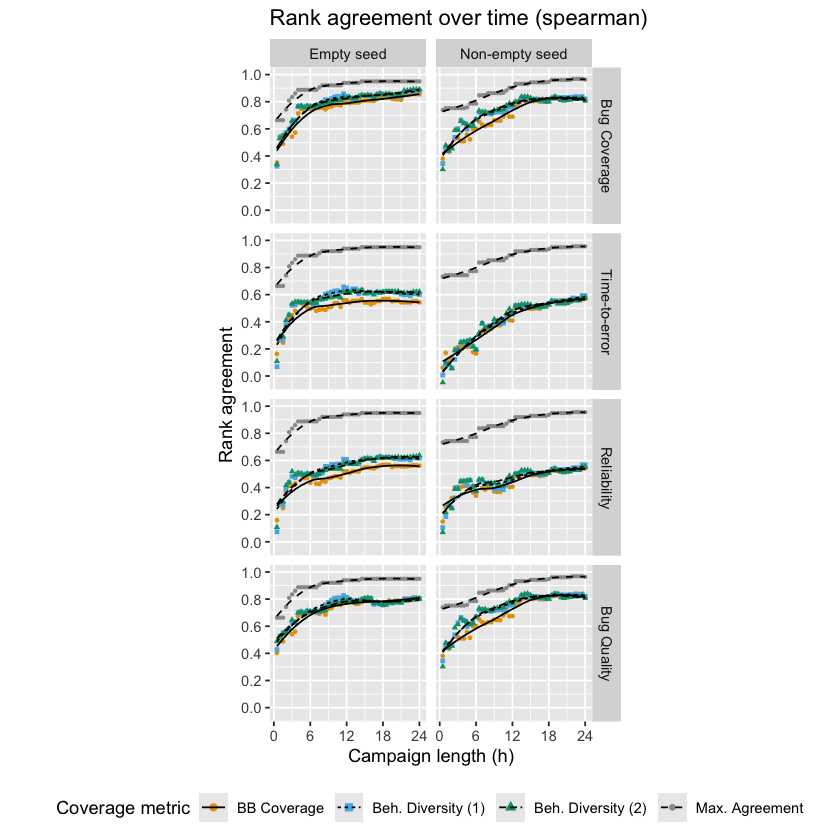

In [48]:
# Generate rank agreement over time plot for spearman and kendall correlation
# Output: plots/generated/rank_agreement/<[spearman|kendall]>_over_time.pdf
agreement_spm <- read.csv("csv/generated/rank-agr-spearman-log2p1-baseline.csv")
plot_rank_agreement(agreement_spm, "spearman", save_file = TRUE) +
  ggtitle("Rank agreement over time (spearman)")

agreement_kdl <- read.csv("csv/generated/rank-agr-kendall-log2p1-baseline.csv")
tmp <- plot_rank_agreement(agreement_kdl, "kendall", save_file = TRUE)

In [49]:
subset(agreement_spm, bug_metric == "Time-to-error" & seed == "Non-empty seed" & time == 24) |>
  select(coverage_metric, seed, agreement) |>
  group_by(coverage_metric, seed) |>
  mutate(
    rounded = round(agreement, 2)
  )

coverage_metric,seed,agreement,rounded
<chr>,<chr>,<dbl>,<dbl>
BB Coverage,Non-empty seed,0.56758211,0.57
Beh. Diversity (-1),Non-empty seed,0.55656396,0.56
Beh. Diversity (-2),Non-empty seed,-0.02326772,-0.02
Beh. Diversity (0),Non-empty seed,0.56758211,0.57
Beh. Diversity (1),Non-empty seed,0.59286161,0.59
Beh. Diversity (2),Non-empty seed,0.57629499,0.58
Max. Agreement,Non-empty seed,0.95602425,0.96


In [50]:
subset(agreement_spm, bug_metric == "Time-to-error" & seed == "Empty seed" & time == 24) |>
  select(coverage_metric, seed, agreement) |>
  group_by(coverage_metric, seed) |>
  mutate(
    agreement = round(agreement / 0.94972860, 2)
  )

coverage_metric,seed,agreement
<chr>,<chr>,<dbl>
BB Coverage,Empty seed,0.57
Beh. Diversity (-1),Empty seed,0.60
Beh. Diversity (-2),Empty seed,0.01
Beh. Diversity (0),Empty seed,0.57
Beh. Diversity (1),Empty seed,0.63
Beh. Diversity (2),Empty seed,0.65
Max. Agreement,Empty seed,1.00


## RQ.3 Agreement on superiority
- Agreement over time in terms of cohens kappa, disagreement proportion, and spearman/kendall rank correlation

In [51]:
superiority <- read.csv("csv/generated/superiority-agr-log2p1-baseline.csv")
head(superiority)

,index,bug_score,alpha,cov_score,time,seed_id,kappa,disagreement,fuzzer_pairs,spearman,kendall
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17569,Reliability,1e-04,BB Coverage,0.25,Empty seed,0.1000000,0.4166667,0.3571429,0.13254949,0.12399232
2,17570,Reliability,1e-04,BB Coverage,0.25,Non-empty seed,0.0000000,0.5000000,0.4642857,-0.03250200,-0.03037614
3,17571,Reliability,1e-04,BB Coverage,0.50,Empty seed,0.0000000,0.4833333,0.3571429,0.09616559,0.09053978
4,17572,Reliability,1e-04,BB Coverage,0.50,Non-empty seed,0.3315789,0.3859649,0.6785714,0.08901309,0.08269571
5,17573,Reliability,1e-04,BB Coverage,0.75,Empty seed,0.1111111,0.4074074,0.3214286,0.10151027,0.09601721
6,17574,Reliability,1e-04,BB Coverage,0.75,Non-empty seed,0.4150000,0.3250000,0.7142857,0.17161188,0.16089360


In [52]:
superiority_agr <- subset(superiority, cov_score %in% c("BB Coverage", "Beh. Diversity (1)", "Beh. Diversity (2)"))

superiority_agr$bug_score <- factor(superiority_agr$bug_score,
    levels = c("Bug Coverage", "Time-to-error", "Reliability", "Bug Quality")
)

superiority_agr <- subset(superiority_agr, floor(time * 2) == time * 2)

plot_superiority_agreement <- function(statistic, significance_level, save_file = FALSE) {
  plt <- ggplot(subset(superiority_agr, alpha == significance_level)) +
    geom_point(
      aes(time, !!sym(statistic), color = fuzzer_pairs, shape = cov_score),
      size = 0.75, alpha = 0.9
    ) +
    stat_smooth(
      aes(time, !!sym(statistic), linetype = cov_score),
      geom = "line",
      n = 96,
      linewidth = 0.4,
    ) +
    facet_grid(seed_id ~ bug_score) +
    scale_x_continuous(breaks = seq(0, 25, by = 6), name = "Campaign length (h)") +
    scale_color_viridis_c(
      limits = c(0, 1.0),
      labels = scales::percent,
      breaks = c(0.2, 0.5, 0.8),
      guide = guide_colorbar(barwidth = 7, barheight = 1, title.position = "left")
    ) +
    theme(
      aspect.ratio = 1,
      legend.position = "bottom",
      legend.key.size = unit(15, "pt"),
      legend.text = element_text(size = 8)
    ) +
    guides(shape = "none")

  if (save_file) {
    plot_name <- sprintf("plots/generated/superiority_agreement/%s-%s.pdf", statistic, as.character(significance_level))
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [53]:
# Generate agreement on superiority over time for each statistic and alpha
# Output: plots/generated/superiority_agreement/<statistic>-<alpha>.pdf
for (statistic in c("kappa", "disagreement", "spearman", "kendall")) {
  for (significance_level in c(0.05, 0.01, 0.001)) {
    plot_superiority_agreement(statistic, significance_level, save_file = TRUE)
  }
}

Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


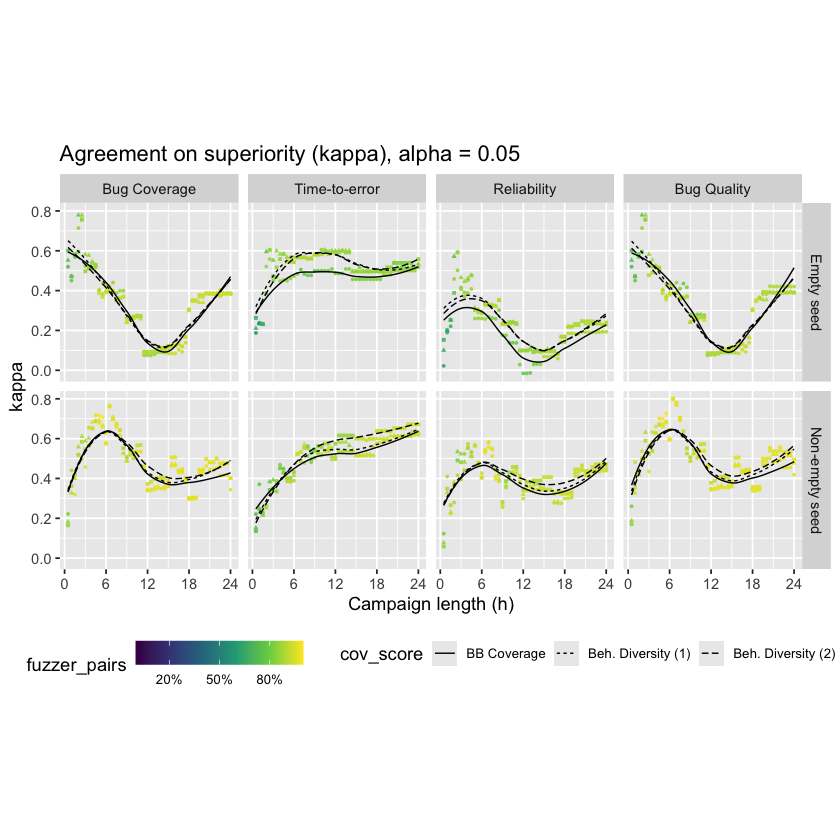

In [54]:
plot_superiority_agreement("kappa", 0.05) +
  ggtitle("Agreement on superiority (kappa), alpha = 0.05")

In [55]:
superiority |>
  subset(alpha == 0.05 & time == 24) |>
  subset(bug_score == "Time-to-error" & seed_id == "Non-empty seed")

,index,bug_score,alpha,cov_score,time,seed_id,kappa,disagreement,fuzzer_pairs,spearman,kendall
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17472,397889,Time-to-error,0.05,BB Coverage,24,Non-empty seed,0.6188769,0.1437729,0.9285714,0.43698512,0.40398260
17664,399617,Time-to-error,0.05,Beh. Diversity (-1),24,Non-empty seed,0.5339207,0.1594286,0.8928571,0.42388822,0.38916158
17856,400577,Time-to-error,0.05,Beh. Diversity (-2),24,Non-empty seed,0.1209500,0.5460000,0.8928571,-0.04132332,-0.03537827
18048,401537,Time-to-error,0.05,Beh. Diversity (0),24,Non-empty seed,0.6188769,0.1437729,0.9285714,0.43698512,0.40398260
18240,402497,Time-to-error,0.05,Beh. Diversity (1),24,Non-empty seed,0.6334320,0.1344322,0.9285714,0.45687074,0.42044666
18432,403457,Time-to-error,0.05,Beh. Diversity (2),24,Non-empty seed,0.6718935,0.1248168,0.9285714,0.47111242,0.43311794


#### Compare disagreement reasons
- Disagreement because raters disagree on the superior fuzzer (superiority in terms of both measures)
- Disagreement because only one rater determines a superior fuzzer (partial superiority)

In [56]:
superiority_breakdown <- read.csv("csv/generated/superiority_breakdown.csv")

In [57]:
head(superiority_breakdown)

,proxy_metric,bug_metric,seed,alpha,fuzzer_x,fuzzer_y,value_type,value
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,bb_coverage,bug_coverage_3,1,0.05,afl,afl,none,NA
2,bb_coverage,bug_coverage_3,1,0.05,afl,aflfast,partial_superiority,3
3,bb_coverage,bug_coverage_3,1,0.05,afl,aflpp,partial_superiority,5
4,bb_coverage,bug_coverage_3,1,0.05,afl,aflsmart,partial_superiority,2
5,bb_coverage,bug_coverage_3,1,0.05,afl,fairfuzz,partial_superiority,0
6,bb_coverage,bug_coverage_3,1,0.05,afl,honggfuzz,partial_superiority,3


In [58]:
plot_superiority_breakdown <- function(proxy, bug, seed_id, significance_lvl, save_file = FALSE) {
  values <- superiority_breakdown |>
    subset(proxy_metric == proxy & bug_metric == bug) |>
    subset(seed == seed_id & alpha == significance_lvl)

  subject_limits <- if (seed_id == 1) c(0, 6) else c(0, 8)


  plt <- ggplot(values, aes(x = fuzzer_x, y = fuzzer_y, fill = value)) +
    geom_tile(color = "black", lwd = 0.5, linetype = 1, na.rm = TRUE) +
    #geom_text(aes(label = value), color = "white", size = 4, na.rm = TRUE) +
    scale_fill_viridis(limits = subject_limits) +
    coord_fixed() +
    labs(x = NULL, y = NULL) +
    guides(fill = guide_colourbar(title = "# benchmarks")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/superiority_agreement/superiority_breakdown/%s/%s-%s-%s.pdf",
      ifelse(seed_id == 1, "empty_seed", "non_empty_seed"),
      proxy, bug, as.character(significance_lvl)
    )
    ggsave(plot_name, create.dir = TRUE, scale = 0.75)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [59]:
# Generate superiority breakdown for each proxy-bug combination
# Output: plots/generated/superiority_agreement/superiority_breakdown/<seed_id>/<proxy_metric>-<bug_metric>-<alpha>.pdf
for (proxy_metric in c("bb_coverage", "hill_number_1", "hill_number_2")) {
  for (bug_metric in c("bug_coverage_3", "tte", "bb_score", "bug_quality")) {
    for (seed in c(1, 2)) {
      for (alpha in c(0.05, 0.01, 0.001)) {
        plot_superiority_breakdown(
          proxy_metric, bug_metric, seed, alpha, save_file = TRUE
        )
      }
    }
  }
}

Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 i

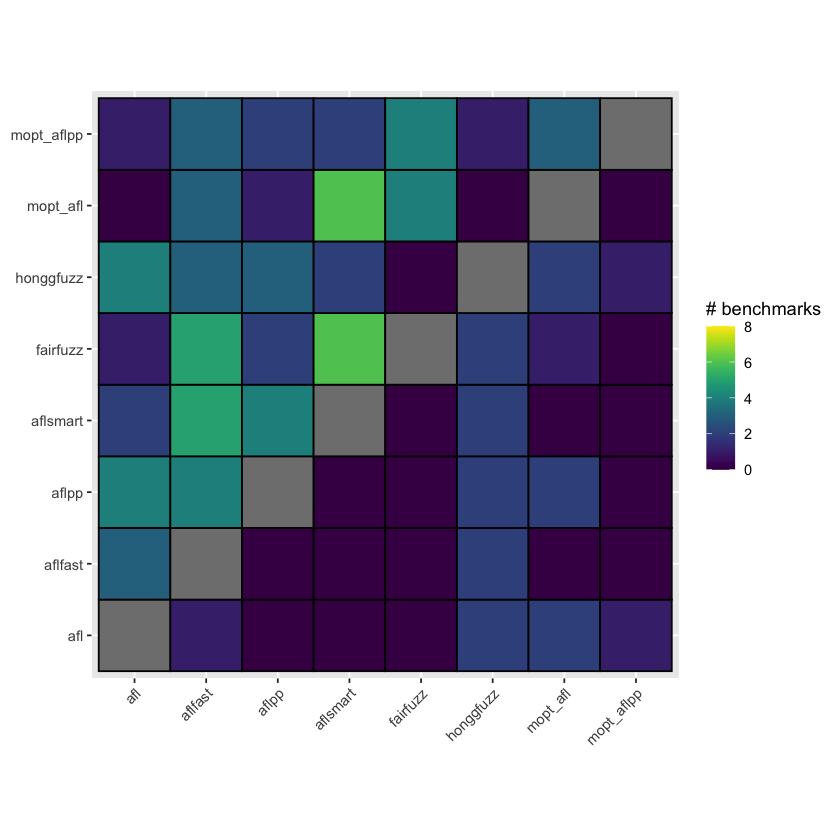

In [60]:
# Upper triangle, above diagonal: disagreement due to partial superiority (only proxy or bug superiority, but not both)
# Lower riangle below diagonal: disagreement due to superiority disagreement (superiority in terms of both proxy and bug performance, but they disagree)
plot_superiority_breakdown("bb_coverage", "tte", 2, 0.05)

In [61]:
superiority_breakdown <- read.csv("csv/generated/superiority_breakdown.csv")

for (seed_id in c(1, 2)) {
  for (significance_lvl in c(0.05, 0.01, 0.001)) {

    values <- subset(superiority_breakdown, seed == seed_id & alpha == significance_lvl)

    values$bug_metric <- factor(values$bug_metric, levels = c("bug_coverage_3", "tte", "bb_score", "bug_quality"))

    ggplot(values, aes(x = fuzzer_x, y = fuzzer_y, fill = value)) +
      geom_tile(color = "black", lwd = 0.25, linetype = 1, na.rm = TRUE) +
      scale_fill_viridis() +
      coord_fixed() +
      labs(x = NULL, y = NULL) +
      guides(fill = guide_colourbar(title = "# benchmarks")) +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        facet_grid(
          bug_metric ~ proxy_metric,
          labeller = as_labeller(c(
            "bb_coverage" = "BB Coverage",
            "hill_number_1" = "Beh. Diversity (1)",
            "hill_number_2" = "Beh. Diversity (2)",
            "bug_coverage_3" = "Bug Coverage",
            "tte" = "Time-to-error",
            "bb_score" = "Reliability",
            "bug_quality" = "Bug Quality"
          ))
        ) +
        theme(
          legend.direction = "horizontal",
          legend.position = "bottom",
          aspect.ratio = 1.0,
          axis.text.x = element_text(angle = 45, hjust = 1)
        )

    plot_name <- sprintf(
      "plots/generated/superiority_agreement/superiority_breakdown/%s/summary/grid_%s.pdf",
      ifelse(seed_id == 1, "empty_seed", "non_empty_seed"),
      as.character(significance_lvl)
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


### Determine observed agreement vs. chance agreement between fuzzer pairs

In [62]:
kappa_breakdown <- read.csv("csv/generated/kappa_breakdown.csv") |>
  mutate(value = round(value, 2))
head(kappa_breakdown)

,proxy_metric,bug_metric,seed,alpha,fuzzer_x,fuzzer_y,value_type,value
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,bb_coverage,bug_coverage_3,1,0.05,afl,afl,none,NA
2,bb_coverage,bug_coverage_3,1,0.05,afl,aflfast,chance_agreement,0.25
3,bb_coverage,bug_coverage_3,1,0.05,afl,aflpp,chance_agreement,1.00
4,bb_coverage,bug_coverage_3,1,0.05,afl,aflsmart,chance_agreement,0.50
5,bb_coverage,bug_coverage_3,1,0.05,afl,fairfuzz,chance_agreement,0.50
6,bb_coverage,bug_coverage_3,1,0.05,afl,honggfuzz,chance_agreement,1.00


In [63]:
plot_kappa_breakdown <- function(proxy, bug, seed_id, significance_lvl, save_file = FALSE) {
  values <- kappa_breakdown |>
    subset(proxy_metric == proxy & bug_metric == bug) |>
    subset(seed == seed_id & alpha == significance_lvl)

  plt <- ggplot(values, aes(x = fuzzer_x, y = fuzzer_y, fill = value)) +
    geom_tile(color = "black", lwd = 0.5, linetype = 1, na.rm = TRUE) +
    geom_text(aes(label = value), color = "white", size = 4, na.rm = TRUE) +
    coord_fixed() +
    labs(x = NULL, y = NULL) +
    guides(fill = guide_colourbar(title = "Probability")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/superiority_agreement/kappa_breakdown/%s/%s-%s-%s.pdf",
      ifelse(seed_id == 1, "empty_seed", "non_empty_seed"),
      proxy, bug, as.character(significance_lvl)
    )
    ggsave(plot_name, create.dir = TRUE, scale = 0.75)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [64]:
# Generate kappa breakdown (relative vs chance agreement) for each proxy-bug combination
# Output: plots/generated/superiority_agreement/kappa_breakdown/<seed_id>/<proxy_metric>-<bug_metric>-<alpha>.pdf
for (proxy_metric in c("bb_coverage", "hill_number_1", "hill_number_2")) {
  for (bug_metric in c("bug_coverage_3", "tte", "bb_score", "bug_quality")) {
    for (seed in c(1, 2)) {
      for (alpha in c(0.05, 0.01, 0.001)) {
        plot_kappa_breakdown(
          proxy_metric, bug_metric, seed, alpha, save_file = TRUE
        )
      }
    }
  }
}

Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 in image
Saving 5.25 x 5.25 i

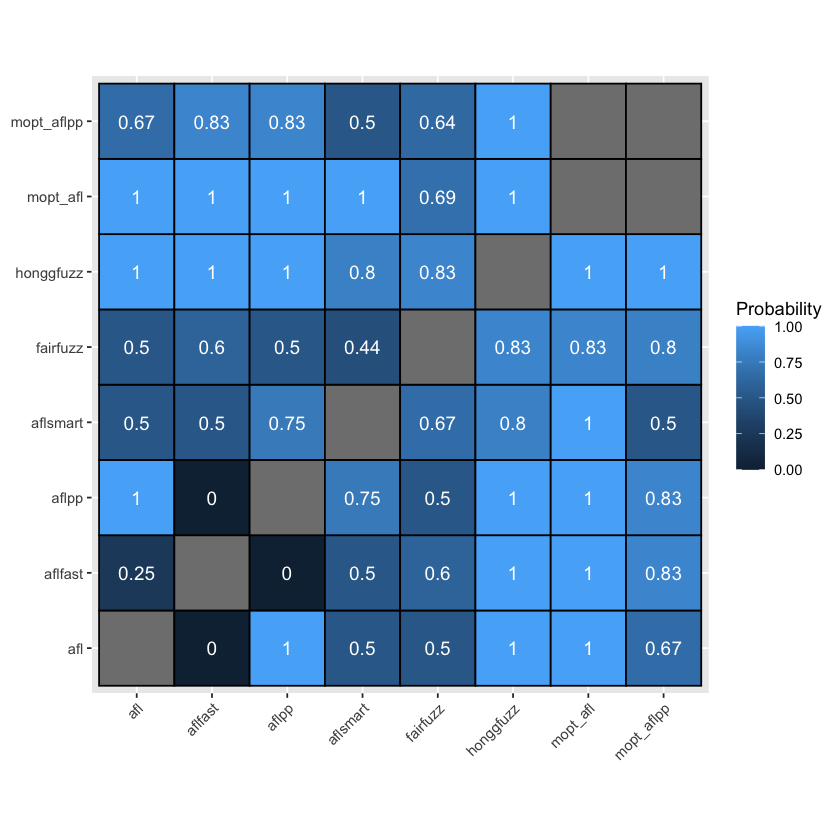

In [65]:
# Upper triangle, above diagonal: pairwise chance agreement
# Lower triangle, below diagonal: pairwise observed agreement
plot_kappa_breakdown("bb_coverage", "bug_coverage_3", 1, 0.05)

In [66]:
head(kappa_breakdown)

,proxy_metric,bug_metric,seed,alpha,fuzzer_x,fuzzer_y,value_type,value
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,bb_coverage,bug_coverage_3,1,0.05,afl,afl,none,NA
2,bb_coverage,bug_coverage_3,1,0.05,afl,aflfast,chance_agreement,0.25
3,bb_coverage,bug_coverage_3,1,0.05,afl,aflpp,chance_agreement,1.00
4,bb_coverage,bug_coverage_3,1,0.05,afl,aflsmart,chance_agreement,0.50
5,bb_coverage,bug_coverage_3,1,0.05,afl,fairfuzz,chance_agreement,0.50
6,bb_coverage,bug_coverage_3,1,0.05,afl,honggfuzz,chance_agreement,1.00


In [67]:
kappa_breakdown <- read.csv("csv/generated/kappa_breakdown.csv") |>
  mutate(value = round(value, 1))


for (seed_id in c(1, 2)) {
  for (significance_lvl in c(0.05, 0.01, 0.001)) {

    values <- subset(kappa_breakdown, seed == seed_id & alpha == significance_lvl)

    values$bug_metric <- factor(values$bug_metric, levels = c("bug_coverage_3", "tte", "bb_score", "bug_quality"))

    ggplot(values, aes(x = fuzzer_x, y = fuzzer_y, fill = value)) +
        geom_tile(color = "black", lwd = 0.25, linetype = 1, na.rm = TRUE) +
        geom_text(
          aes(label = value),
          color = "white", size = 2, na.rm = TRUE
        ) +
        coord_fixed() +
        labs(x = NULL, y = NULL) +
        guides(fill = guide_colourbar(title = "Probability")) +
        facet_grid(
          bug_metric ~ proxy_metric,
          labeller = as_labeller(c(
            "bb_coverage" = "BB Coverage",
            "hill_number_1" = "Beh. Diversity (1)",
            "hill_number_2" = "Beh. Diversity (2)",
            "bug_coverage_3" = "Bug Coverage",
            "tte" = "Time-to-error",
            "bb_score" = "Reliability",
            "bug_quality" = "Bug Quality"
          ))
        ) +
        theme(
          legend.direction = "horizontal",
          legend.position = "bottom",
          aspect.ratio = 1.0,
          axis.text.x = element_text(angle = 45, hjust = 1)
        )

    plot_name <- sprintf(
      "plots/generated/superiority_agreement/kappa_breakdown/%s/summary/grid_%s.pdf",
      ifelse(seed_id == 1, "empty_seed", "non_empty_seed"),
      as.character(significance_lvl)
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


## RQ.4 Tiebreaker impact
How does removing the tte tiebreaker impact
- the number of ties in rankings
- agreement on ranking
- agreement on superiority

### RQ4. Tiebreaker impact: avg. number of ties in rankings
- Ties in bug-based rankings limit the maximum achievable agreement if the proxy-based ranking does not contain the same number of ties
- We compute the median number of unique ranks (across subjects) per performance metric
- Fewer unique ranks -> higher ratio of ties

In [68]:
# Combine coverage and bug ranks into single dataframe
c_ranks <- ungroup(coverage_ranks) |>
  rename(
    metric = scoring_function,
    rank = coverage_rank
  ) |>
  mutate(metric_type = "Coverage-based") |>
  select(metric_type, metric, subject, fuzzer, seed_id, time, rank)

b_ranks_no_tiebreak <- ungroup(bug_ranks_no_tiebreak) |>
  #subset(scoring_function != "bug_quality") |>
  rename(
    metric = scoring_function,
    rank = bug_rank
  ) |>
  mutate(metric_type = "Bug-based") |>
  select(metric_type, metric, subject, fuzzer, seed_id, time, rank)

b_ranks <- ungroup(bug_ranks) |>
  #subset(scoring_function != "bug_quality") |>
  rename(
    metric = scoring_function,
    rank = bug_rank
  ) |>
  mutate(metric_type = "Bug-based (with tiebreak)") |>
  select(metric_type, metric, subject, fuzzer, seed_id, time, rank)

fuzzer_rankings <- rbind(c_ranks, b_ranks_no_tiebreak, b_ranks)

# Determine average number of unique rankings
nunique_ranks <- fuzzer_rankings |>
    mutate(
        metric = recode(metric,
        "bb_coverage" = "BB Coverage",
        "hill_number_1" = "Beh. Diversity (1)",
        "hill_number_2" = "Beh. Diversity (2)",
        "bug_coverage_3" = "Bug Coverage",
        "tte" = "Time-to-error",
        "bb_score" = "Reliability",
        "bug_quality" = "Bug Quality"
        )
    ) |>
    group_by(metric_type, metric, subject, seed_id, time) |>
    summarize(
        unique_ranks = n_distinct(rank)
    ) |>
    group_by(metric_type, metric, seed_id, time) |>
    summarize(
        mean_unique_ranks = mean(unique_ranks),
        median_unique_ranks = median(unique_ranks)
    )

# Uncomment when positioning legend at bottom
nunique_ranks$metric <- factor(nunique_ranks$metric,
    levels = c(
                "Bug Coverage",
                "BB Coverage",
                "Time-to-error",
                "Beh. Diversity (1)",
                "Reliability",
                "Beh. Diversity (2)",
                "Bug Quality"
            )
)

nunique_ranks$seed_id <- factor(
  nunique_ranks$seed_id,
  levels = c("1", "2"),
  labels = c("Empty seed", "Non-empty seed")
)

plot_nunique_ranks <- function(df, metric_shapes, file_name) {
  plt <- ggplot(df, aes(time, mean_unique_ranks)) +
    geom_point(aes(color = metric, shape = metric), size = 1.2) +
    scale_x_continuous(breaks = c(1, 6, 12, 18, 24), limits = c(1, 24)) +
    scale_y_continuous(breaks = seq(1, 8), limits = c(1, 8)) +
    #scale_color_brewer(type = "qual", palette = "Set2") +
    #scale_color_colorblind() +
    scale_color_manual(
        values = c(
            "Bug Coverage" = "#CC79A7",
            "Time-to-error" = "#0072B2",
            "Reliability" = "#D55E00",
            "BB Coverage" = "#E69F00",
            "Beh. Diversity (1)" = "#56B4E9",
            "Beh. Diversity (2)" = "#009E73",
            "Bug Quality" = "#999999"
        )
    ) +
    scale_shape_manual(values = metric_shapes) +
    xlab("Campaign length (in hours)") +
    ylab("Median number of unique ranks") +
    labs(color = "Metric", shape = "Metric") +
    facet_grid(
      seed_id ~ metric_type
    ) +
    theme(
            aspect.ratio = 1,
            legend.position = "bottom",
    )
  ggsave(file_name, scale = 0.7, create.dir = TRUE)
  knitr::plot_crop(file_name)
  return(plt)
}

`summarise()` has grouped output by 'metric_type', 'metric', 'subject',
'seed_id'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'metric_type', 'metric', 'seed_id'. You can
override using the `.groups` argument.


Saving 4.9 x 4.9 in image
Saving 4.9 x 4.9 in image


[1] "plots/tiebreak_impact/generated/unique_rankings_nolegend.pdf"

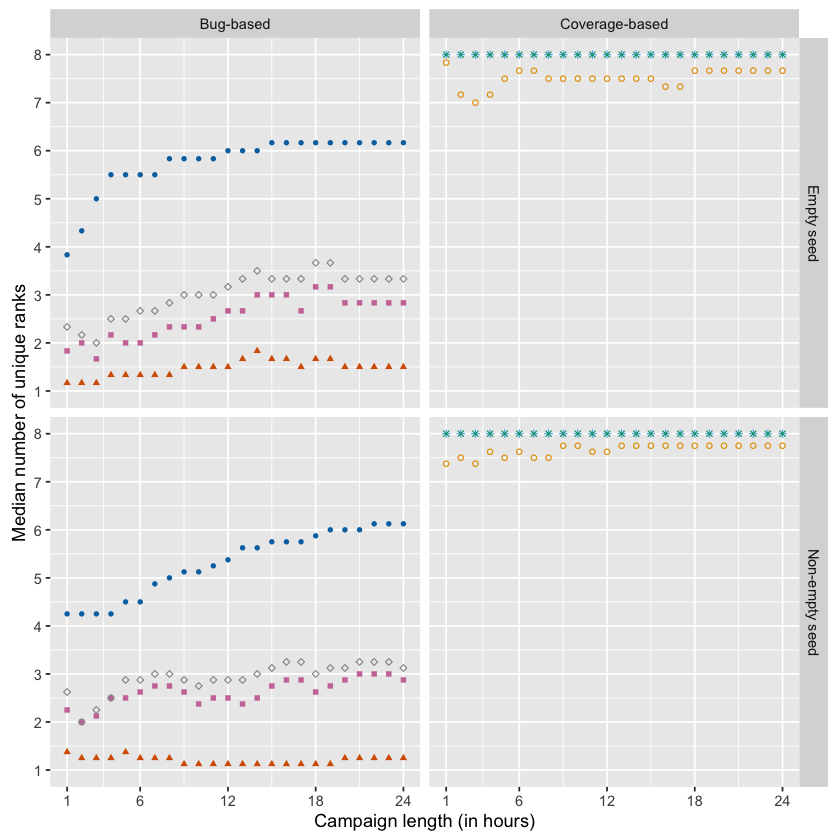

Saving 7 x 7 in image


[1] "plots/generated/tiebreak_impact/unique_rankings_legend.pdf"

Saving 4.9 x 4.9 in image


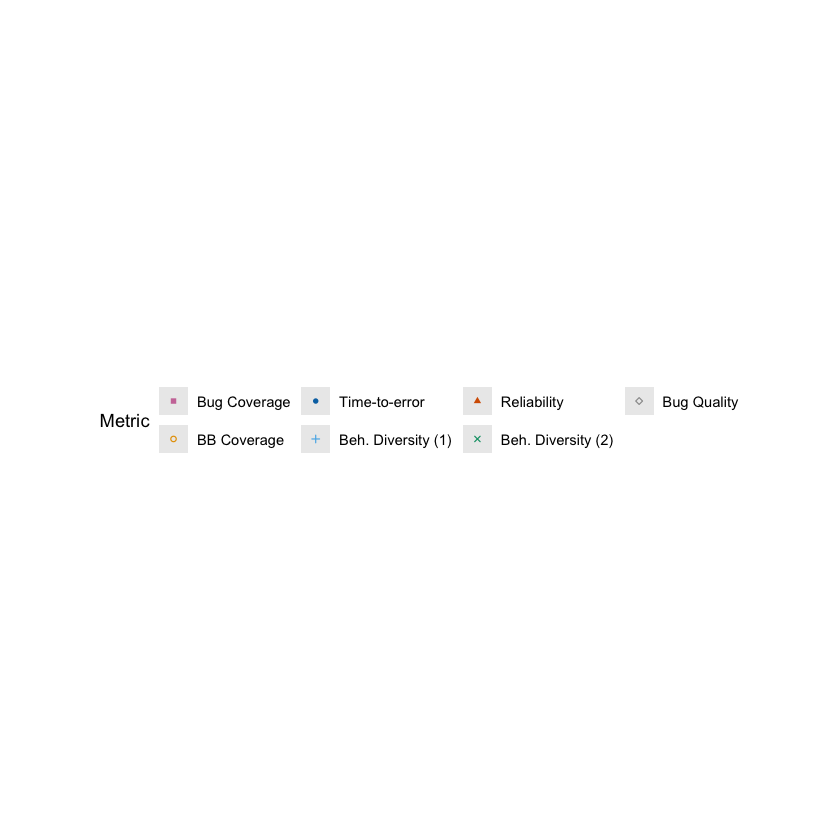

Saving 4.9 x 4.9 in image


[1] "plots/generated/tiebreak_impact/unique_rankings_tiebreak_nolegend.pdf"

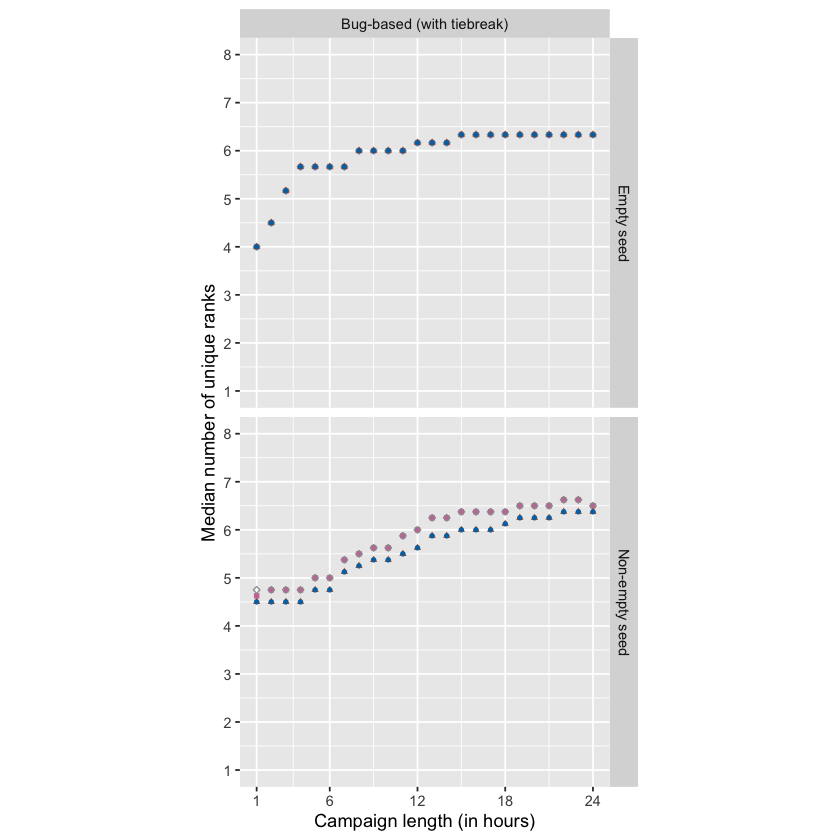

In [69]:
# Plot median #unique ranks across all subjects
# Output: plots/generated/tiebreak_impact/unique_rankings_*.pdf

plt_no_tiebreak <- subset(nunique_ranks, floor(time) == time) |>
  subset(metric_type %in% c("Bug-based", "Coverage-based"))

plt_tiebreak <- subset(nunique_ranks, floor(time) == time) |>
  subset(metric_type %in% c("Bug-based (with tiebreak)"))

# Separate plot and legend
plt1 <- plot_nunique_ranks(
  df = plt_no_tiebreak,
  metric_shapes = c(15, 1, 16, 3, 17, 4, 23),
  file_name = "plots/generated/tiebreak_impact/unique_rankings_full.pdf"
)

plt1 + theme(legend.position = "none")
ggsave("plots/generated/tiebreak_impact/unique_rankings_nolegend.pdf", scale = 0.7)
knitr::plot_crop("plots/tiebreak_impact/generated/unique_rankings_nolegend.pdf")

legend <- get_legend(plt1)
as_ggplot(legend)
ggsave("plots/generated/tiebreak_impact/unique_rankings_legend.pdf")
knitr::plot_crop("plots/generated/tiebreak_impact/unique_rankings_legend.pdf")


plt2 <- plot_nunique_ranks(
  df = plt_tiebreak,
  metric_shapes = c(15, 16, 17, 23),
  file_name = "plots/generated/tiebreak_impact/unique_rankings_tiebreak.pdf"
)
plt2 + theme(legend.position = "none")
ggsave("plots/generated/tiebreak_impact/unique_rankings_tiebreak_nolegend.pdf", scale = 0.7)
knitr::plot_crop("plots/generated/tiebreak_impact/unique_rankings_tiebreak_nolegend.pdf")

### RQ4. Tiebreaker impact: agreement on ranking over time
- We compare the difference between rank agreement without tiebreak and the baseline agreement (with tiebreak)
- Negative values, (i.e., [agreement with tiebreak] > [agreement w/o tiebreak]), suggest a positive impact of including the tte tiebreaker

In [70]:
rank_agr_base <- read.csv("csv/generated/rank-agr-spearman-log2p1-baseline.csv")
rank_agr_notb <- read.csv("csv/generated/rank-agr-spearman-log2p1-notiebreak.csv")

head(rank_agr_base)

,index,bug_metric,coverage_metric,time,seed,agreement
,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,0,Reliability,BB Coverage,0.25,Empty seed,0.2500842
2,1,Reliability,BB Coverage,0.50,Empty seed,0.1595214
3,2,Reliability,BB Coverage,0.75,Empty seed,0.2212148
4,3,Reliability,BB Coverage,1.00,Empty seed,0.2772533
5,4,Reliability,BB Coverage,1.25,Empty seed,0.2275160
6,5,Reliability,BB Coverage,1.50,Empty seed,0.2486654


In [71]:
plot_rank_agreement_diff <- function(base_df, notb_df, agr_name, save_file = FALSE) {
  rank_agr_diff <- merge(base_df, notb_df,
    by = c("bug_metric", "coverage_metric", "time", "seed"),
    suffixes = c("_x", "_y")
  ) |>
  mutate(
    d_agreement = agreement_y - agreement_x
  )

  rank_agr_diff$bug_metric <- factor(rank_agr_diff$bug_metric,
  levels = c("Bug Coverage", "Time-to-error", "Reliability", "Bug Quality"))

  rank_agr_diff <- subset(rank_agr_diff, coverage_metric %in%
    c("BB Coverage", "Beh. Diversity (1)", "Beh. Diversity (2)", "Max. Agreement")
  )

  rank_agr_diff <- subset(rank_agr_diff, bug_metric %in% c("Bug Coverage", "Bug Quality", "Reliability", "Time-to-error"))

  rank_agr_diff <- subset(rank_agr_diff, floor(time * 2) == time * 2)

  plt <- ggplot(rank_agr_diff, aes(time, d_agreement)) +
      geom_point(aes(color = coverage_metric, shape = coverage_metric), size = 1)   +
      stat_smooth(aes(linetype = coverage_metric), geom = "line", linewidth = 0.5, color = "black", n = 24) +
      scale_x_continuous(breaks = seq(0, 25, by = 6), name = "Campaign length (h)") +
      scale_y_continuous(limits = c(-0.7, 0.7), name = "Rank agreement difference") +
      geom_hline(yintercept = 0, linetype = "longdash", color = "darkgrey", linewidth = 0.5) +
      scale_color_manual(
          values = c(
              "BB Coverage" = "#E69F00",
              "Beh. Diversity (1)" = "#56B4E9",
              "Beh. Diversity (2)" = "#009E73",
              "Max. Agreement" = "#999999"
          )
      ) +
      scale_shape_manual(values = c(16, 15, 17, 20)) +
      labs(color = "Coverage metric", linetype = "Coverage metric", shape = "Coverage metric") +
      facet_grid(bug_metric ~ seed, scales = "free") +
      theme(aspect.ratio = 1, legend.position = "bottom") +
      guides(color = guide_legend(override.aes = list(size = 2)))

  if (save_file) {
    plot_name <- sprintf("plots/generated/tiebreak_impact/rank_agreement/%s.pdf", agr_name)
    ggsave(plot_name, scale = 1., create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


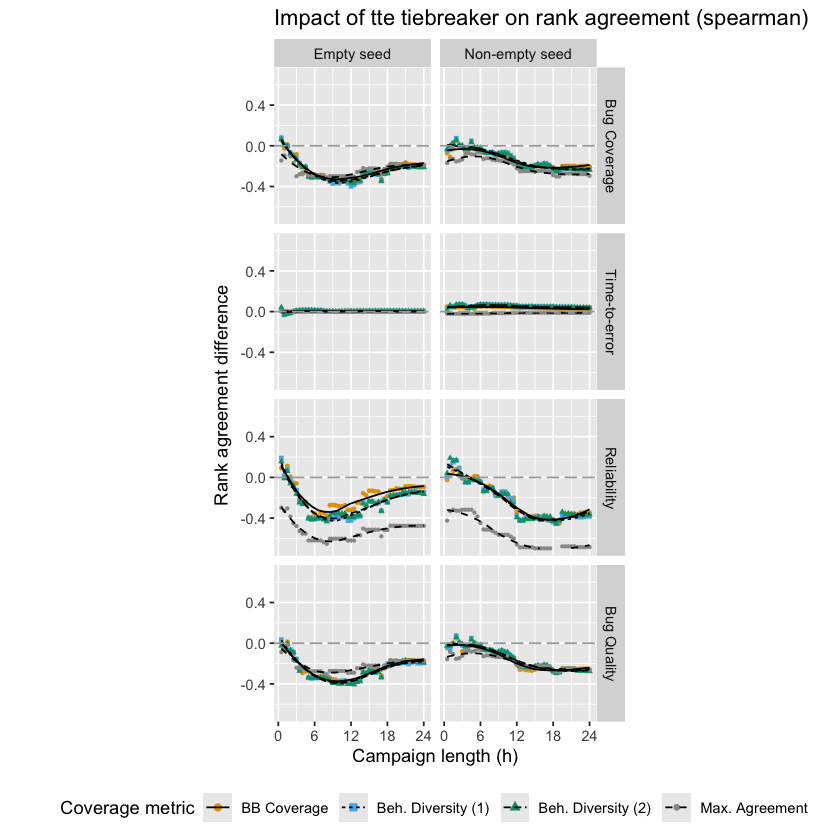

In [72]:
# Plot agreement on ranking difference over time for spearman and kendall rank correlation
# Output: plots/generated/tiebreak_impact/rank_agreement/<[spearman|kendall]>.pdf

rank_spm_base <- read.csv("csv/generated/rank-agr-spearman-log2p1-baseline.csv")
rank_spm_notb <- read.csv("csv/generated/rank-agr-spearman-log2p1-notiebreak.csv")

rank_agr_diff_spm <- plot_rank_agreement_diff(
  rank_spm_base, rank_spm_notb, "spearman", save_file = TRUE
)

rank_kdl_base <- read.csv("csv/generated/rank-agr-kendall-log2p1-baseline.csv")
rank_rkdl_notb <- read.csv("csv/generated/rank-agr-kendall-log2p1-notiebreak.csv")

rank_agr_diff_kdl <- plot_rank_agreement_diff(
  rank_kdl_base, rank_rkdl_notb, "kendall", save_file = TRUE
)

rank_agr_diff_spm +
  ggtitle("Impact of tte tiebreaker on rank agreement (spearman)")

### RQ4. Tiebreaker impact: agreement on superiority over time
- We compare the difference between superiority agreement without tiebreak and the baseline agreement (with tiebreak)
- Negative values, (i.e., [agreement with tiebreak] > [agreement w/o tiebreak]), suggest a positive impact of including the tte tiebreaker,
except for disagreement proportion, where lower values are more desirable (thus, positive values suggest a positive impact)

In [73]:
sup_agr_base <- read.csv("csv/generated/superiority-agr-log2p1-baseline.csv")
sup_agr_notb <- read.csv("csv/generated/superiority-agr-log2p1-notiebreak.csv")

sup_agr_base$bug_score <- factor(sup_agr_base$bug_score,
    levels = c("Bug Coverage", "Time-to-error", "Reliability", "Bug Quality")
)

sup_agr_notb <- sup_agr_notb |>
  mutate(
    bug_score = recode(bug_score,
      "bug_coverage_3" = "Bug Coverage",
      "tte" = "Time-to-error",
      "bb_score" = "Reliability",
      "bug_quality" = "Bug Quality",
    ),
    cov_score = recode(cov_score,
      "bb_coverage" = "BB Coverage",
      "hill_number_1" = "Beh. Diversity (1)",
      "hill_number_2" = "Beh. Diversity (2)"
    ),
    seed_id = recode(seed_id,
      "empty" = "Empty seed",
      "non-empty" = "Non-empty seed"
    )
  )

sup_agr_notb$bug_score <- factor(sup_agr_notb$bug_score,
    levels = c("Bug Coverage", "Time-to-error", "Reliability", "Bug Quality")
)

In [74]:
sup_agr_diff <- merge(sup_agr_base, sup_agr_notb,
    by = c("bug_score", "alpha", "cov_score", "time", "seed_id"),
    suffixes = c("_x", "_y")
  ) |>
  mutate(
    d_kappa = kappa_y - kappa_x,
    d_disagreement = disagreement_y - disagreement_x,
    d_fuzzer_pairs = fuzzer_pairs_y - fuzzer_pairs_x,
    d_spearman = spearman_y - spearman_x,
    d_kendall = kendall_y - kendall_x,
  ) |>
  select(bug_score, alpha, cov_score, time, seed_id, d_kappa, d_disagreement, d_fuzzer_pairs, d_spearman, d_kendall)

sup_agr_diff <- subset(sup_agr_diff, cov_score %in% c("BB Coverage", "Beh. Diversity (1)", "Beh. Diversity (2)"))

sup_agr_diff <- subset(sup_agr_diff, floor(time * 2) == time * 2)

In [75]:
plot_superiority_agreement_diff <- function(statistic, significance_level, save_file = FALSE) {
  plt <- ggplot(subset(sup_agr_diff, alpha == significance_level)) +
    geom_point(
      aes(time, !!sym(statistic), color = d_fuzzer_pairs, shape = cov_score),
      size = 1
    ) +
    geom_hline(yintercept = 0, linetype = "longdash", color = "darkgrey", size = 0.5) +
    stat_smooth(
      aes(time, !!sym(statistic), linetype = cov_score),
      geom = "line",
      n = 96,
      linewidth = 0.5,
    ) +
    facet_grid(seed_id ~ bug_score) +
    scale_x_continuous(breaks = seq(0, 25, by = 6), name = "Campaign length (h)") +
    scale_y_continuous(limits = c(-0.65, 0.65), name = "Superiority agreement difference") +
    scale_color_viridis_c(
      limits = c(-1, 0),
      labels = scales::percent,
      guide = guide_colorbar(barwidth = 7, barheight = 1, title.position = "left", order = 1),
      option = "plasma"
    ) +
    theme(
      aspect.ratio = 1,
      legend.position = "bottom",
      legend.key.size = unit(10, "pt"),
      legend.text = element_text(size = 6)
    ) +
    guides(shape = "none")

  if (save_file) {
    plot_name <- sprintf(
      "plots/generated/tiebreak_impact/superiority_agreement/%s-%s.pdf",
      statistic, as.character(significance_level)
    )
    ggsave(plot_name, create.dir = TRUE)
    knitr::plot_crop(plot_name)
  }

  return(plt)
}

In [76]:
# Plot agreement on superiority difference over time for each statistic and alpha
# Output: plots/generated/tiebreak_impact/superiority_agreement/<statistic>-<alpha>.pdf
for (statistic in c("d_kappa", "d_disagreement", "d_spearman", "d_kendall")) {
  for (significance_level in c(0.05, 0.01, 0.001)) {
    plot_superiority_agreement_diff(statistic, significance_level, save_file = TRUE)
  }
}

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`)."
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`)."


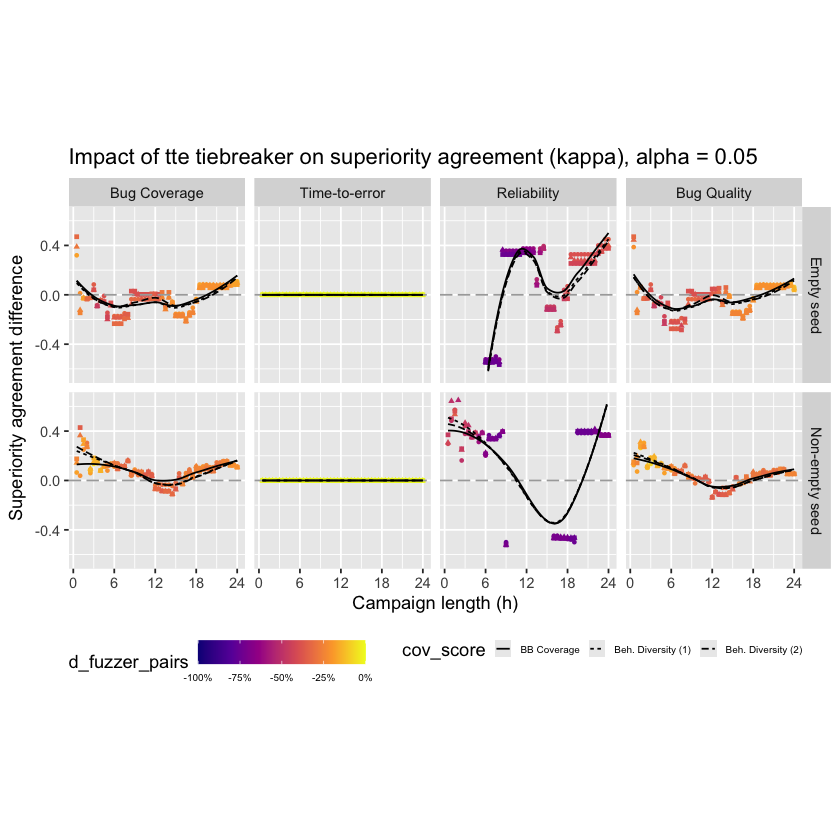

In [77]:
plot_superiority_agreement_diff("d_kappa", 0.001) +
  ggtitle("Impact of tte tiebreaker on superiority agreement (kappa), alpha = 0.05")

In [78]:
# For some intervals, the difference plot appears to be cut off
# We can see that there are no rows for t=1h - t=6h,
# indicating that differences are not significant for enough benchmarks 

subset(sup_agr_notb, bug_score == "Reliability" & alpha == "0.001" & seed_id == "Empty seed" & time >= 1.0 & time < 6.0)

index,bug_score,alpha,cov_score,time,seed_id,kappa,disagreement,fuzzer_pairs,spearman,kendall
<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


---